In [7]:
import gzip
import shutil

# Specify the input .csv.gz file path and the output .csv file path
compressed_input_path = r"/Users/chethanharinath/Documents/DPA/data_public.csv.gz"  # Note the raw string (r"")
decompressed_csv_path = r"/Users/chethanharinath/Documents/DPA/data_public.csv"

# Open the .csv.gz file and write its decompressed content to a new .csv file
with gzip.open(compressed_input_path, 'rt') as gz_file:  # 'rt' mode for reading text
    with open(decompressed_csv_path, 'w', newline='') as csv_file:
        shutil.copyfileobj(gz_file, csv_file)

print(f"Decompressed {compressed_input_path} to {decompressed_csv_path}.")


Decompressed /Users/chethanharinath/Documents/DPA/data_public.csv.gz to /Users/chethanharinath/Documents/DPA/data_public.csv.


In [ ]:
import os
import pandas as pd
import numpy as np
import psutil

def impute_missing_values(data_frame):
    """
    Impute missing values in numerical columns with the mean of each respective column.
    """
    num_cols = data_frame.select_dtypes(include=[np.number]).columns
    data_frame[num_cols] = data_frame[num_cols].fillna(data_frame[num_cols].mean())
    return data_frame

def process_large_dataset(csv_input_path, csv_output_path, chunk_row_size=100000):
    """
    Processes a large CSV dataset by reading it in chunks, imputing missing values, and writing
    the processed data to a new output CSV file.
    """
    try:
        # Determine basic details about the input CSV file
        sample_data = pd.read_csv(csv_input_path, nrows=1)
        column_count = len(sample_data.columns)
        row_count = sum(1 for _ in open(csv_input_path)) - 1  # Exclude the header row
        print(f"CSV Input Summary: {row_count} rows, {column_count} columns")

        # Read the CSV in chunks and process each chunk
        chunk_reader = pd.read_csv(csv_input_path, chunksize=chunk_row_size)
        total_rows_processed = 0

        # Open the output CSV for writing processed data
        with open(csv_output_path, 'w', newline='') as processed_file:
            for chunk_index, data_chunk in enumerate(chunk_reader, start=1):
                print(f"Processing chunk #{chunk_index}")

                # Impute missing values
                cleaned_chunk = impute_missing_values(data_chunk)
                rows_in_chunk, cols_in_chunk = cleaned_chunk.shape
                total_rows_processed += rows_in_chunk

                # Write the cleaned chunk to the output file
                if chunk_index == 1:
                    cleaned_chunk.to_csv(processed_file, index=False)
                else:
                    cleaned_chunk.to_csv(processed_file, index=False, header=False)

                # Log the progress and memory usage
                print(f"Chunk #{chunk_index} Processed: {rows_in_chunk} rows, {cols_in_chunk} columns")
                print(f"Total rows processed: {total_rows_processed} of {row_count}")
                print(f"Current Memory Usage: {psutil.virtual_memory().percent}%")

                # Remove the processed chunk from memory
                del cleaned_chunk

        # Verify the number of rows and columns in the output file
        output_row_count = sum(1 for _ in open(csv_output_path)) - 1  # Subtract 1 for the header row
        output_sample_data = pd.read_csv(csv_output_path, nrows=1)
        output_column_count = len(output_sample_data.columns)

        print("\nDataset Processing Completed.")
        print(f"Input File: {row_count} rows, {column_count} columns")
        print(f"Output File: {output_row_count} rows, {output_column_count} columns")

        if total_rows_processed == row_count == output_row_count and column_count == output_column_count:
            print("All rows and columns successfully processed and matched!")
        else:
            print("Warning: Mismatch detected in the number of rows or columns.")

        print(f"Processed data successfully saved to: {csv_output_path}")

    except FileNotFoundError as file_error:
        print(f"File Not Found: {file_error}. Please ensure the file path is correct.")
    except EOFError as eof_error:
        print(f"Error reading CSV file: {eof_error}. The file may be corrupted.")
    except Exception as unexpected_error:
        print(f"An unexpected error occurred: {unexpected_error}")

# Execute the Processing
output_file_path = r"processed_data_output(1).csv"
process_large_dataset(decompressed_csv_path, output_file_path)



CSV Input Summary: 1200000 rows, 16 columns
Processing chunk #1
Chunk #1 Processed: 100000 rows, 16 columns
Total rows processed: 100000 of 1200000
Current Memory Usage: 96.2%
Processing chunk #2
Chunk #2 Processed: 100000 rows, 16 columns
Total rows processed: 200000 of 1200000
Current Memory Usage: 96.1%
Processing chunk #3
Chunk #3 Processed: 100000 rows, 16 columns
Total rows processed: 300000 of 1200000
Current Memory Usage: 96.0%
Processing chunk #4
Chunk #4 Processed: 100000 rows, 16 columns
Total rows processed: 400000 of 1200000
Current Memory Usage: 95.8%
Processing chunk #5
Chunk #5 Processed: 100000 rows, 16 columns
Total rows processed: 500000 of 1200000
Current Memory Usage: 95.5%
Processing chunk #6
Chunk #6 Processed: 100000 rows, 16 columns
Total rows processed: 600000 of 1200000
Current Memory Usage: 95.5%
Processing chunk #7
Chunk #7 Processed: 100000 rows, 16 columns
Total rows processed: 700000 of 1200000
Current Memory Usage: 95.2%
Processing chunk #8
Chunk #8 Pro

In [ ]:
import os
import pandas as pd
import numpy as np
import psutil

def impute_missing_values(data_frame):
    """
    Impute missing values in numerical columns with the mean of each respective column.
    """
    # Identify numerical columns in the DataFrame
    numerical_cols = data_frame.select_dtypes(include=[np.number]).columns

    # Count the number of missing values before imputing
    missing_count_before = data_frame[numerical_cols].isnull().sum().sum()

    # Fill missing values with column-wise mean
    data_frame[numerical_cols] = data_frame[numerical_cols].fillna(data_frame[numerical_cols].mean())

    # Calculate the total number of missing values that were filled
    missing_values_filled = missing_count_before - data_frame[numerical_cols].isnull().sum().sum()

    return data_frame, missing_values_filled

def process_large_dataset(csv_input_path, csv_output_path, chunk_row_size=100000):
    """
    Processes a large CSV dataset by reading it in chunks, imputing missing values, and writing
    the processed data to a new output CSV file.
    """
    try:
        # Determine basic details about the input CSV file
        sample_data = pd.read_csv(csv_input_path, nrows=1)
        column_count = len(sample_data.columns)
        row_count = sum(1 for _ in open(csv_input_path)) - 1  # Exclude the header row
        print(f"CSV Input Summary: {row_count} rows, {column_count} columns")

        # Read the CSV in chunks and process each chunk
        chunk_reader = pd.read_csv(csv_input_path, chunksize=chunk_row_size)
        total_rows_processed = 0
        total_missing_values_filled = 0

        # Open the output CSV for writing processed data
        with open(csv_output_path, 'w', newline='') as processed_file:
            for chunk_index, data_chunk in enumerate(chunk_reader, start=1):
                print(f"Processing chunk #{chunk_index}")

                # Impute missing values in the current chunk
                cleaned_chunk, missing_filled = impute_missing_values(data_chunk)

                # Update cumulative counters
                total_missing_values_filled += missing_filled
                rows_in_chunk, cols_in_chunk = cleaned_chunk.shape
                total_rows_processed += rows_in_chunk

                # Write the cleaned chunk to the output file
                if chunk_index == 1:
                    cleaned_chunk.to_csv(processed_file, index=False)
                else:
                    cleaned_chunk.to_csv(processed_file, index=False, header=False)

                # Log the progress and memory usage
                print(f"Chunk #{chunk_index} Processed: {rows_in_chunk} rows, {cols_in_chunk} columns")
                print(f"Missing values filled in this chunk: {missing_filled}")
                print(f"Total missing values filled so far: {total_missing_values_filled}")
                print(f"Total rows processed: {total_rows_processed} of {row_count}")
                print(f"Current Memory Usage: {psutil.virtual_memory().percent}%")

                # Remove the processed chunk from memory
                del cleaned_chunk

        # Verify the number of rows and columns in the output file
        output_row_count = sum(1 for _ in open(csv_output_path)) - 1  # Subtract 1 for the header row
        output_sample_data = pd.read_csv(csv_output_path, nrows=1)
        output_column_count = len(output_sample_data.columns)

        # Summary of processing
        print("\nDataset Processing Completed.")
        print(f"Input File Summary: {row_count} rows, {column_count} columns")
        print(f"Output File Summary: {output_row_count} rows, {output_column_count} columns")
        print(f"Total Missing Values Filled: {total_missing_values_filled}")

        # Verification for successful processing
        if total_rows_processed == row_count == output_row_count and column_count == output_column_count:
            print("All rows and columns successfully processed and matched!")
        else:
            print("Warning: Mismatch detected in the number of rows or columns.")

        print(f"Processed data successfully saved to: {csv_output_path}")

    except FileNotFoundError as file_error:
        print(f"File Not Found: {file_error}. Please ensure the file path is correct.")
    except EOFError as eof_error:
        print(f"Error reading CSV file: {eof_error}. The file may be corrupted.")
    except Exception as unexpected_error:
        print(f"An unexpected error occurred: {unexpected_error}")

# Execute the Processing
input_file_path = r"/Users/chethanharinath/Documents/DPA/data_public.csv"  # Updated to absolute path
output_file_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"
process_large_dataset(input_file_path, output_file_path)


CSV Input Summary: 1200000 rows, 16 columns
Processing chunk #1
Chunk #1 Processed: 100000 rows, 16 columns
Missing values filled in this chunk: 0
Total missing values filled so far: 0
Total rows processed: 100000 of 1200000
Current Memory Usage: 96.3%
Processing chunk #2
Chunk #2 Processed: 100000 rows, 16 columns
Missing values filled in this chunk: 0
Total missing values filled so far: 0
Total rows processed: 200000 of 1200000
Current Memory Usage: 96.2%
Processing chunk #3
Chunk #3 Processed: 100000 rows, 16 columns
Missing values filled in this chunk: 0
Total missing values filled so far: 0
Total rows processed: 300000 of 1200000
Current Memory Usage: 96.0%
Processing chunk #4
Chunk #4 Processed: 100000 rows, 16 columns
Missing values filled in this chunk: 0
Total missing values filled so far: 0
Total rows processed: 400000 of 1200000
Current Memory Usage: 95.9%
Processing chunk #5
Chunk #5 Processed: 100000 rows, 16 columns
Missing values filled in this chunk: 0
Total missing val

Processed chunk #1 with 100000 rows. Total rows processed: 100000
Processed chunk #2 with 100000 rows. Total rows processed: 200000
Processed chunk #3 with 100000 rows. Total rows processed: 300000
Processed chunk #4 with 100000 rows. Total rows processed: 400000
Processed chunk #5 with 100000 rows. Total rows processed: 500000
Processed chunk #6 with 100000 rows. Total rows processed: 600000
Processed chunk #7 with 100000 rows. Total rows processed: 700000
Processed chunk #8 with 100000 rows. Total rows processed: 800000
Processed chunk #9 with 100000 rows. Total rows processed: 900000
Processed chunk #10 with 100000 rows. Total rows processed: 1000000
Processed chunk #11 with 100000 rows. Total rows processed: 1100000
Processed chunk #12 with 100000 rows. Total rows processed: 1200000

Descriptive Statistics for Numeric Columns:
        Mean  Standard Deviation     Minimum     Maximum
A  50.686560          129.249190  -73.089401  268.773840
B -18.833727           14.463539  -83.22357

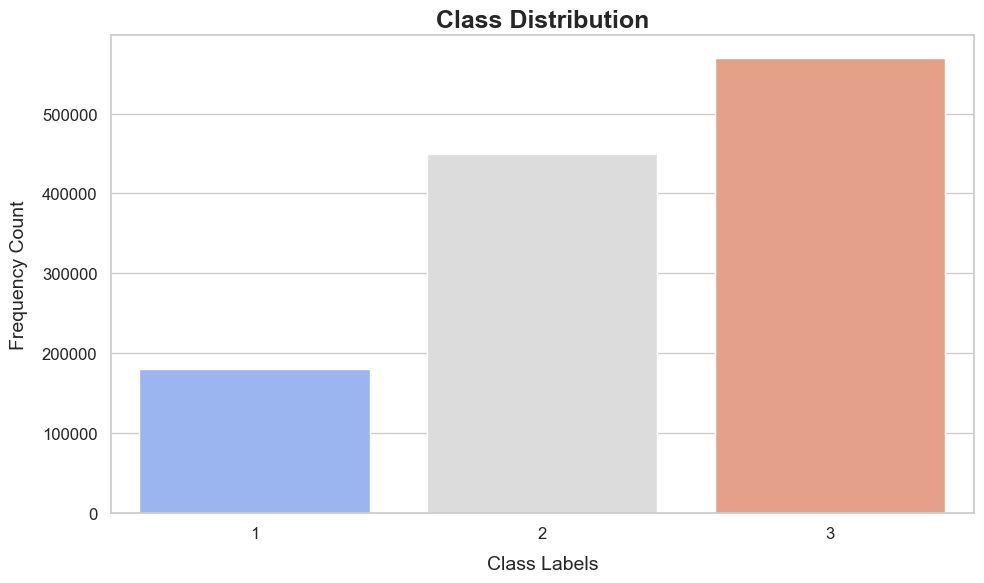

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_large_dataset(csv_input_path, chunk_row_size=100000):
    """
    Analyze a large CSV dataset by processing it in chunks, calculating descriptive statistics, and
    visualizing class distribution.
    """
    try:
        # Initialize aggregation variables
        total_rows = 0
        numeric_sums = None
        numeric_sums_squares = None
        numeric_min_values = None
        numeric_max_values = None
        class_distribution = {}

        # Process CSV data in chunks
        for chunk_idx, chunk in enumerate(pd.read_csv(csv_input_path, chunksize=chunk_row_size), start=1):
            # Update total rows processed
            total_rows += len(chunk)

            # Identify numeric columns (excluding 'Class') and initialize aggregations if necessary
            numeric_columns = chunk.select_dtypes(include=np.number).columns.drop('Class', errors='ignore')

            # Initialize or update aggregations
            if numeric_sums is None:
                numeric_sums = chunk[numeric_columns].sum()
                numeric_sums_squares = (chunk[numeric_columns] ** 2).sum()
                numeric_min_values = chunk[numeric_columns].min()
                numeric_max_values = chunk[numeric_columns].max()
            else:
                numeric_sums += chunk[numeric_columns].sum()
                numeric_sums_squares += (chunk[numeric_columns] ** 2).sum()
                numeric_min_values = np.minimum(numeric_min_values, chunk[numeric_columns].min())
                numeric_max_values = np.maximum(numeric_max_values, chunk[numeric_columns].max())

            # Update class frequency counts dynamically
            class_counts = chunk['Class'].value_counts().to_dict()
            for cls_label, count in class_counts.items():
                if cls_label in class_distribution:
                    class_distribution[cls_label] += count
                else:
                    class_distribution[cls_label] = count

            # Log progress
            print(f"Processed chunk #{chunk_idx} with {len(chunk)} rows. Total rows processed: {total_rows}")

        # Calculate mean and standard deviation for numeric columns
        mean_values = numeric_sums / total_rows
        std_values = np.sqrt(numeric_sums_squares / total_rows - mean_values ** 2)

        # Display descriptive statistics for numeric columns
        print("\nDescriptive Statistics for Numeric Columns:")
        stats_df = pd.DataFrame({
            'Mean': mean_values,
            'Standard Deviation': std_values,
            'Minimum': numeric_min_values,
            'Maximum': numeric_max_values
        })
        print(stats_df)

        # Display class distribution
        print("\nClass Distribution:")
        sorted_class_distribution = dict(sorted(class_distribution.items()))
        for cls_label, count in sorted_class_distribution.items():
            print(f"Class {cls_label}: {count} ({(count / total_rows) * 100:.2f}%)")

        # Visualize class distribution using a different approach with enhanced aesthetics
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        custom_palette = sns.color_palette("coolwarm", len(sorted_class_distribution))
        sns.barplot(x=list(sorted_class_distribution.keys()), y=list(sorted_class_distribution.values()), palette=custom_palette)
        plt.title('Class Distribution', fontsize=18, fontweight='bold')
        plt.xlabel('Class Labels', fontsize=14, labelpad=10)
        plt.ylabel('Frequency Count', fontsize=14, labelpad=10)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()

    except FileNotFoundError as file_error:
        print(f"File Not Found: {file_error}. Please ensure the file path is correct.")
    except EOFError as eof_error:
        print(f"Error reading CSV file: {eof_error}. The file may be corrupted.")
    except KeyError as key_error:
        print(f"Key Error: {key_error}. Check the column names, especially for the 'Class' column.")
    except Exception as unexpected_error:
        print(f"An unexpected error occurred: {unexpected_error}")

# Execute the function to analyze the CSV file
input_file_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)" # Updated to your given path
analyze_large_dataset(input_file_path)


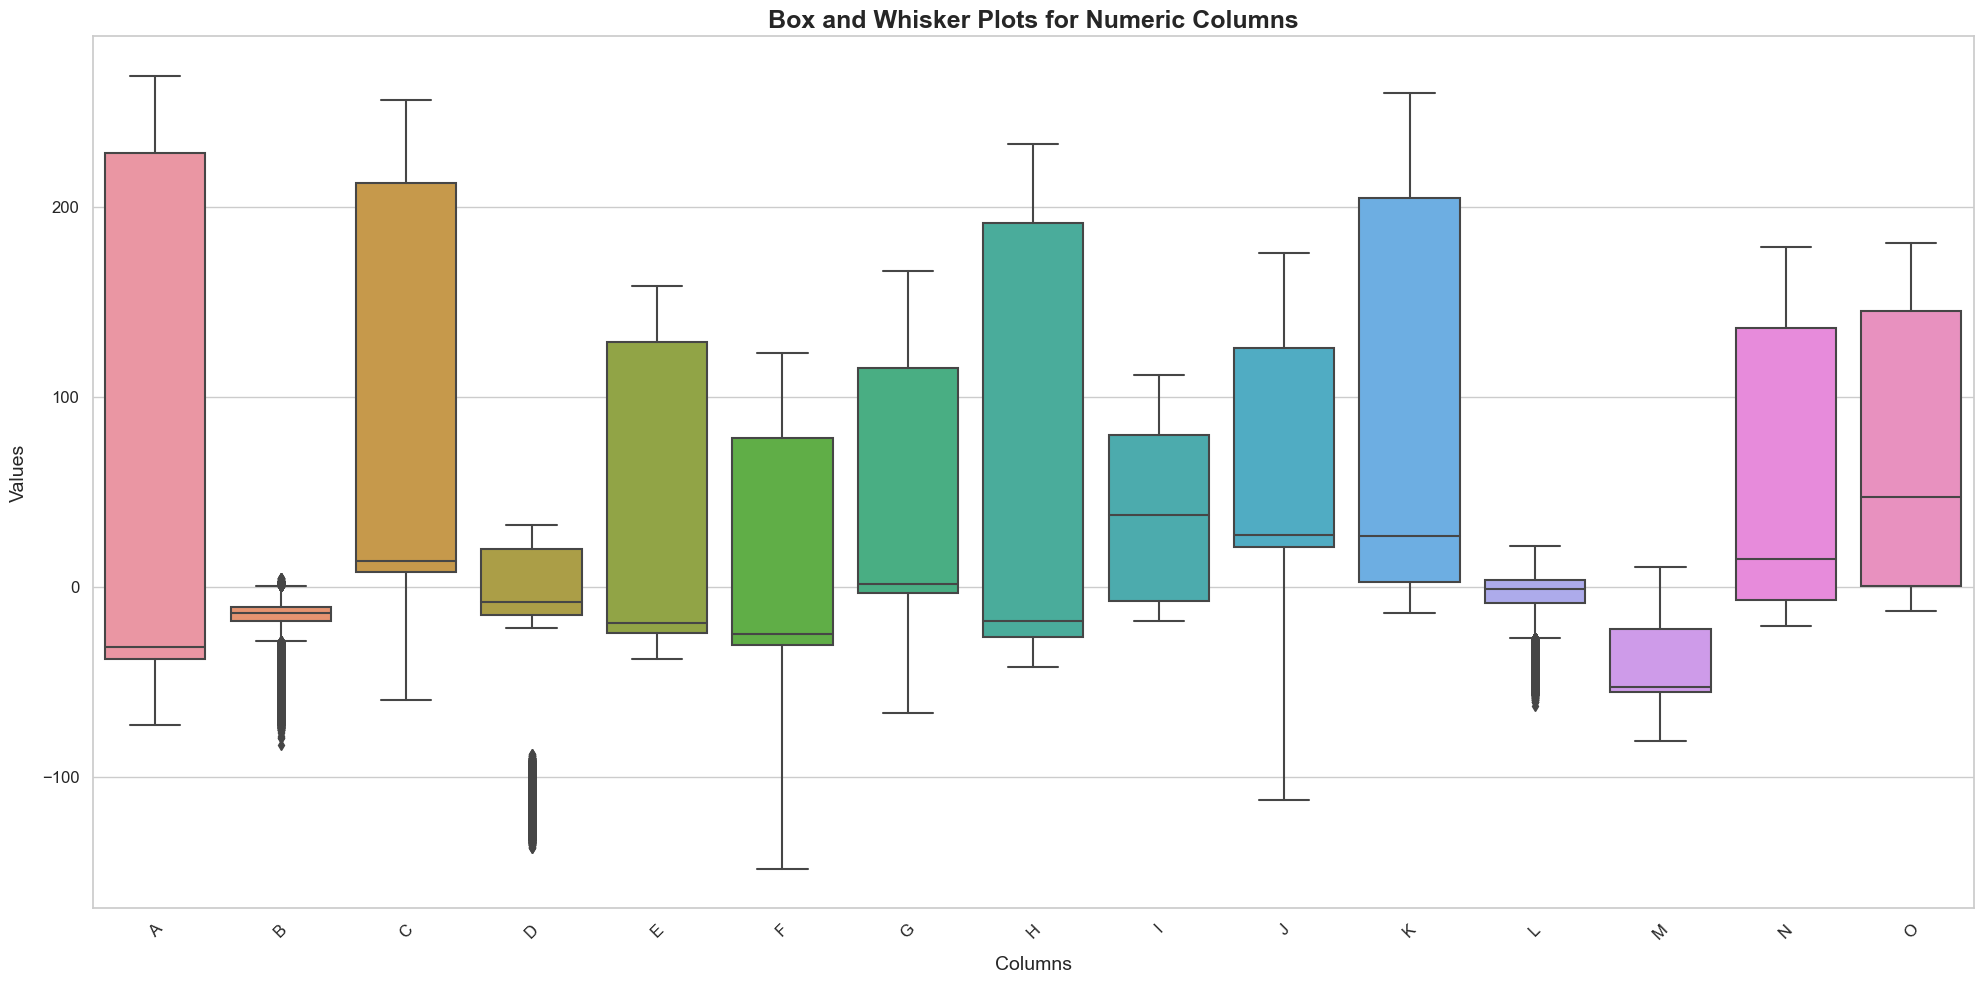

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_box_plot(file_path):
    """
    Create box plots for numeric columns from a CSV file.
    """
    try:
        # Read the entire CSV file
        df = pd.read_csv(file_path)

        # Select numeric columns, excluding 'Class' if present
        numeric_columns = df.select_dtypes(include=np.number).columns.drop('Class', errors='ignore')
        numeric_data = df[numeric_columns]

        # Create box plots for numeric columns
        plt.figure(figsize=(20, 10))
        sns.set(style="whitegrid")
        sns.boxplot(data=numeric_data)
        plt.title('Box and Whisker Plots for Numeric Columns', fontsize=18, fontweight='bold')
        plt.xlabel('Columns', fontsize=14, labelpad=10)
        plt.ylabel('Values', fontsize=14, labelpad=10)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()

    except FileNotFoundError as file_error:
        print(f"File Not Found: {file_error}. Please ensure the file path is correct.")
    except pd.errors.EmptyDataError as empty_error:
        print(f"Empty Data Error: {empty_error}. The file is empty.")
    except KeyError as key_error:
        print(f"Key Error: {key_error}. Check the column names, especially for the 'Class' column.")
    except Exception as unexpected_error:
        print(f"An unexpected error occurred: {unexpected_error}")

file_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"
create_box_plot(file_path)


Processed chunk #1 with 100000 rows.
Processed chunk #2 with 100000 rows.
Processed chunk #3 with 100000 rows.
Processed chunk #4 with 100000 rows.
Processed chunk #5 with 100000 rows.
Processed chunk #6 with 100000 rows.
Processed chunk #7 with 100000 rows.
Processed chunk #8 with 100000 rows.
Processed chunk #9 with 100000 rows.
Processed chunk #10 with 100000 rows.
Processed chunk #11 with 100000 rows.
Processed chunk #12 with 100000 rows.


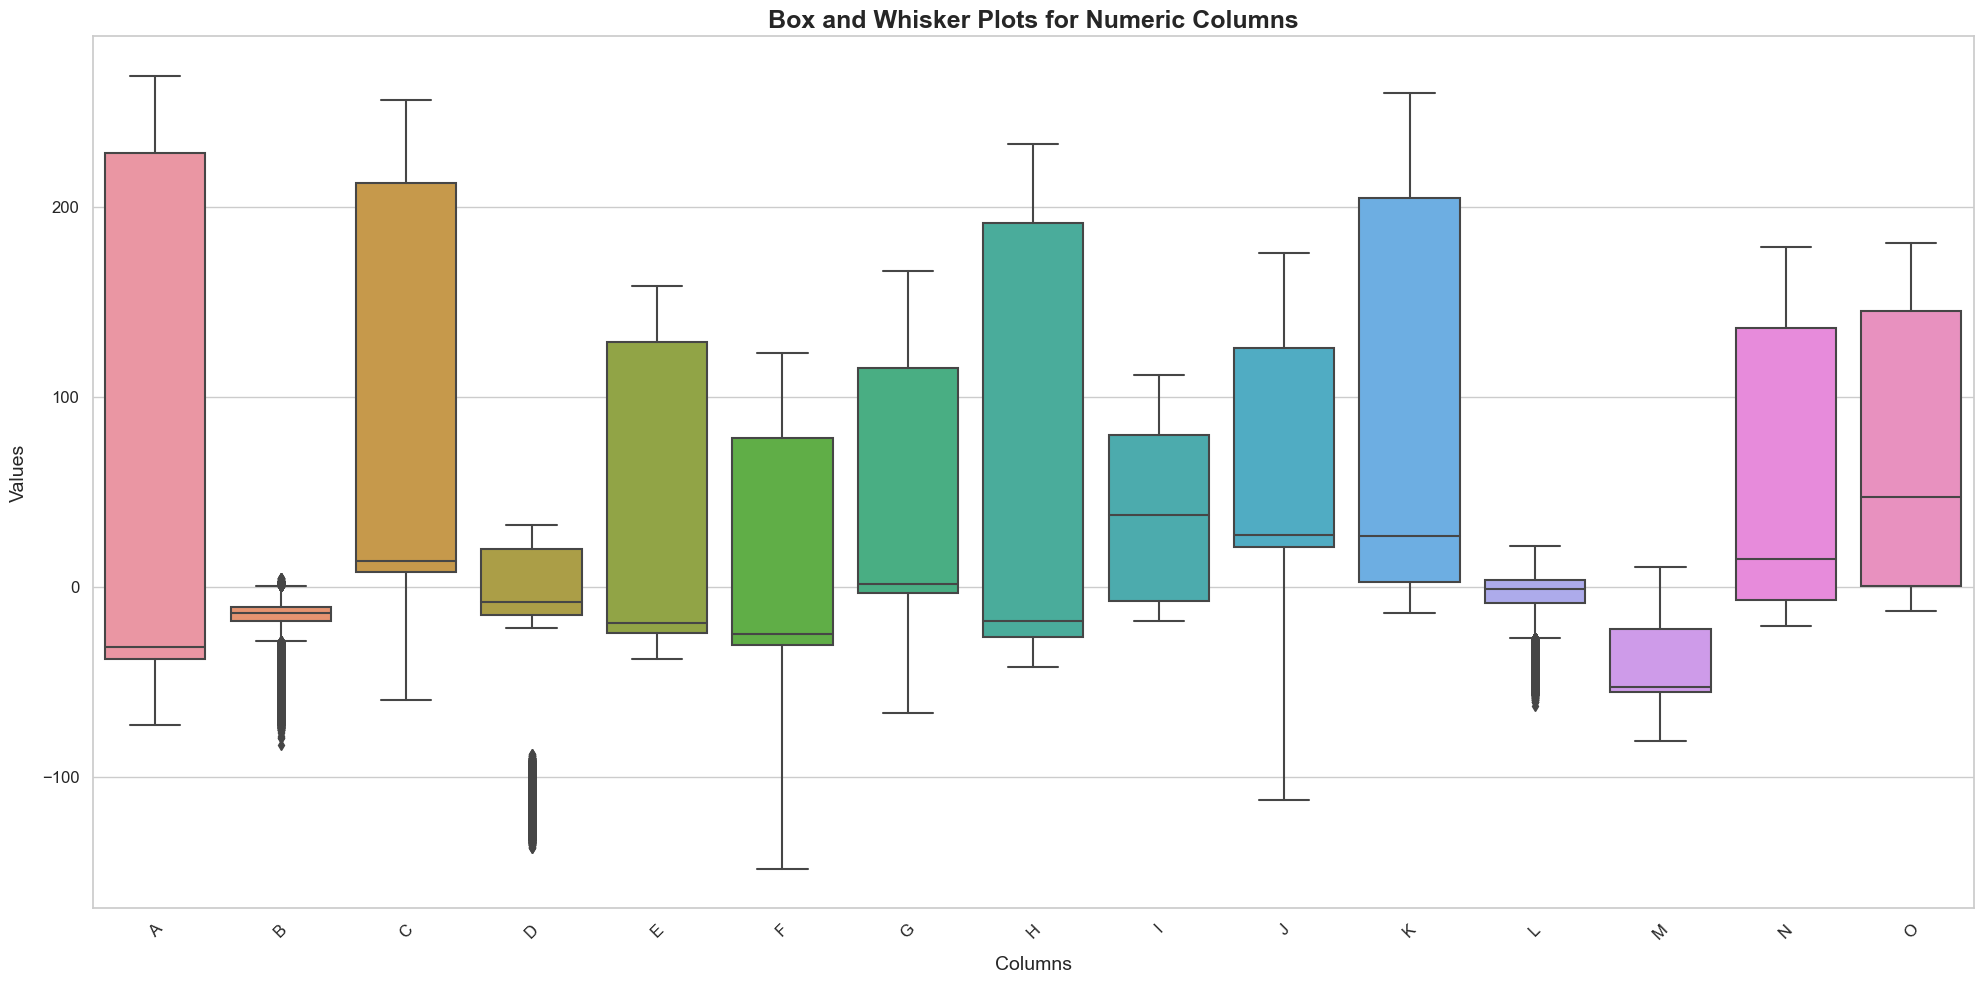

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def explore_data(file_path, chunksize=100000):
    """
    Explore data by reading in chunks and creating box plots for numeric columns.
    """
    try:
        # Initialize list to collect data for box plot
        aggregated_data = []

        # Read the CSV file in chunks and collect numeric data
        for chunk_idx, chunk in enumerate(pd.read_csv(file_path, chunksize=chunksize), start=1):
            # Select numeric columns except the 'Class' column if present
            numeric_data = chunk.select_dtypes(include='number').drop(columns='Class', errors='ignore')
            aggregated_data.append(numeric_data)

            # Log progress
            print(f"Processed chunk #{chunk_idx} with {len(chunk)} rows.")

        # Combine data from all chunks for visualization
        combined_data = pd.concat(aggregated_data, ignore_index=True)

        # Plot box plots for all numeric columns
        plt.figure(figsize=(20, 10))
        sns.set(style="whitegrid")
        sns.boxplot(data=combined_data)
        plt.title('Box and Whisker Plots for Numeric Columns', fontsize=18, fontweight='bold')
        plt.xlabel('Columns', fontsize=14, labelpad=10)
        plt.ylabel('Values', fontsize=14, labelpad=10)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()

    except FileNotFoundError as file_error:
        print(f"File Not Found: {file_error}. Please ensure the file path is correct.")
    except pd.errors.EmptyDataError as empty_error:
        print(f"Empty Data Error: {empty_error}. The file is empty.")
    except KeyError as key_error:
        print(f"Key Error: {key_error}. Check the column names, especially for the 'Class' column.")
    except Exception as unexpected_error:
        print(f"An unexpected error occurred: {unexpected_error}")

# Usage
file_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"
explore_data(file_path)


Processed chunk #1 with 100000 rows.
Processed chunk #2 with 100000 rows.
Processed chunk #3 with 100000 rows.
Processed chunk #4 with 100000 rows.
Processed chunk #5 with 100000 rows.
Processed chunk #6 with 100000 rows.
Processed chunk #7 with 100000 rows.
Processed chunk #8 with 100000 rows.
Processed chunk #9 with 100000 rows.
Processed chunk #10 with 100000 rows.
Processed chunk #11 with 100000 rows.
Processed chunk #12 with 100000 rows.


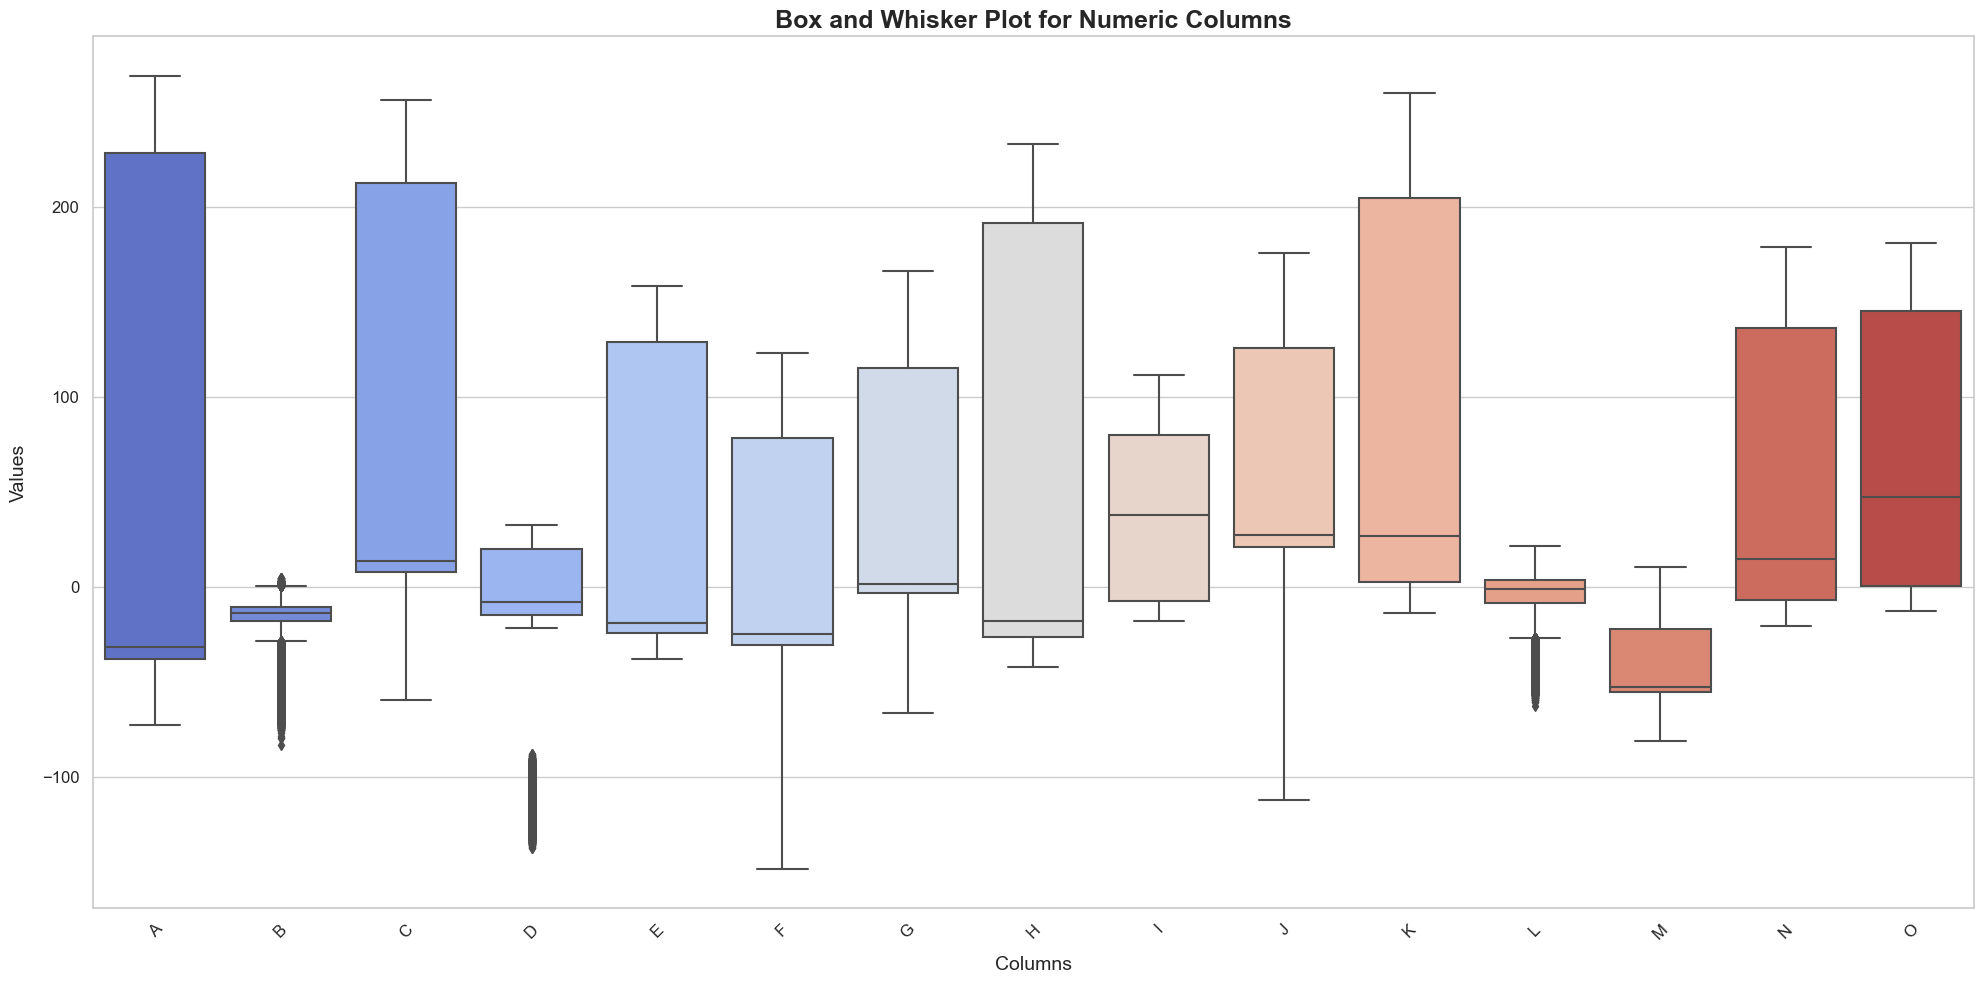


Outlier Summary:
A: 0 outliers
B: 200303 outliers
C: 0 outliers
D: 200103 outliers
E: 0 outliers
F: 0 outliers
G: 0 outliers
H: 0 outliers
I: 0 outliers
J: 0 outliers
K: 0 outliers
L: 198366 outliers
M: 0 outliers
N: 0 outliers
O: 0 outliers


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_data_with_outliers(file_path, chunksize=100000):
    """
    Analyze data by reading in chunks, calculating outliers for numeric columns, 
    and creating box plots for visualization.
    """
    try:
        # Initialize list for box plot data and dictionary for outlier counts
        data_for_boxplot = []
        outlier_summary = {}

        # Process CSV file in chunks
        for chunk_idx, chunk in enumerate(pd.read_csv(file_path, chunksize=chunksize), start=1):
            # Select numeric columns (excluding 'Class' column if present)
            numeric_data = chunk.select_dtypes(include=np.number).drop(columns='Class', errors='ignore')
            data_for_boxplot.append(numeric_data)

            # Calculate outliers for each numeric column using IQR
            for column in numeric_data.columns:
                q1 = numeric_data[column].quantile(0.25)
                q3 = numeric_data[column].quantile(0.75)
                iqr = q3 - q1
                lower_threshold = q1 - 1.5 * iqr
                upper_threshold = q3 + 1.5 * iqr

                # Identify outliers
                outliers = numeric_data[(numeric_data[column] < lower_threshold) | (numeric_data[column] > upper_threshold)][column]
                outlier_summary[column] = outlier_summary.get(column, 0) + len(outliers)

            # Log progress
            print(f"Processed chunk #{chunk_idx} with {len(chunk)} rows.")

        # Concatenate all the data collected for box plots
        combined_boxplot_data = pd.concat(data_for_boxplot, ignore_index=True)

        # Create box plots for numeric columns
        plt.figure(figsize=(20, 10))
        sns.set(style="whitegrid")
        sns.boxplot(data=combined_boxplot_data, palette='coolwarm')
        plt.title('Box and Whisker Plot for Numeric Columns', fontsize=18, fontweight='bold')
        plt.xlabel('Columns', fontsize=14, labelpad=10)
        plt.ylabel('Values', fontsize=14, labelpad=10)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()

        # Display the count of outliers for each column
        print("\nOutlier Summary:")
        for column, count in outlier_summary.items():
            print(f"{column}: {count} outliers")

    except FileNotFoundError as file_error:
        print(f"File Not Found: {file_error}. Please ensure the file path is correct.")
    except pd.errors.EmptyDataError as empty_error:
        print(f"Empty Data Error: {empty_error}. The file is empty.")
    except KeyError as key_error:
        print(f"Key Error: {key_error}. Check the column names, especially for the 'Class' column.")
    except Exception as unexpected_error:
        print(f"An unexpected error occurred: {unexpected_error}")

# Usage
file_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"
analyze_data_with_outliers(file_path)


In [ ]:
import pandas as pd
import numpy as np

def analyze_data_with_detailed_outliers(file_path, chunksize=100000):
    """
    Analyze data by reading in chunks, calculating detailed outliers for numeric columns,
    and displaying a summary.
    """
    try:
        # Initialize dictionary for detailed outlier counts
        outlier_summary = {}

        # Process CSV file in chunks
        for chunk in pd.read_csv(file_path, chunksize=chunksize):
            # Select numeric columns (excluding 'Class' column if present)
            numeric_data = chunk.select_dtypes(include=np.number).drop(columns='Class', errors='ignore')

            # Calculate detailed outliers for each numeric column using IQR
            for column in numeric_data.columns:
                q1 = numeric_data[column].quantile(0.25)
                q3 = numeric_data[column].quantile(0.75)
                iqr = q3 - q1
                lower_threshold = q1 - 1.5 * iqr
                upper_threshold = q3 + 1.5 * iqr

                # Identify outliers below and above the thresholds
                below_threshold_outliers = numeric_data[numeric_data[column] < lower_threshold]
                above_threshold_outliers = numeric_data[numeric_data[column] > upper_threshold]

                below_count = len(below_threshold_outliers)
                above_count = len(above_threshold_outliers)

                if column not in outlier_summary:
                    outlier_summary[column] = {'below': 0, 'above': 0}

                outlier_summary[column]['below'] += below_count
                outlier_summary[column]['above'] += above_count

        # Display the detailed count of outliers for each column
        print("\nOutlier Summary:")
        total_outliers = 0
        for column, counts in outlier_summary.items():
            total_count = counts['below'] + counts['above']
            total_outliers += total_count
            print(f"{column}: {total_count} outliers ({counts['below']} below threshold, {counts['above']} above threshold)")

        print(f"\nTotal number of outliers across all columns: {total_outliers}")

    except FileNotFoundError as file_error:
        print(f"File Not Found: {file_error}. Please ensure the file path is correct.")
    except pd.errors.EmptyDataError as empty_error:
        print(f"Empty Data Error: {empty_error}. The file is empty.")
    except KeyError as key_error:
        print(f"Key Error: {key_error}. Check the column names, especially for the 'Class' column.")
    except Exception as unexpected_error:
        print(f"An unexpected error occurred: {unexpected_error}")

# Usage
file_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"
analyze_data_with_detailed_outliers(file_path)



Outlier Summary:
A: 0 outliers (0 below threshold, 0 above threshold)
B: 200303 outliers (199909 below threshold, 394 above threshold)
C: 0 outliers (0 below threshold, 0 above threshold)
D: 200103 outliers (200103 below threshold, 0 above threshold)
E: 0 outliers (0 below threshold, 0 above threshold)
F: 0 outliers (0 below threshold, 0 above threshold)
G: 0 outliers (0 below threshold, 0 above threshold)
H: 0 outliers (0 below threshold, 0 above threshold)
I: 0 outliers (0 below threshold, 0 above threshold)
J: 0 outliers (0 below threshold, 0 above threshold)
K: 0 outliers (0 below threshold, 0 above threshold)
L: 198366 outliers (198365 below threshold, 1 above threshold)
M: 0 outliers (0 below threshold, 0 above threshold)
N: 0 outliers (0 below threshold, 0 above threshold)
O: 0 outliers (0 below threshold, 0 above threshold)

Total number of outliers across all columns: 598772


Column B: Lower bound = -28.86521233582577, Upper bound = 0.4170216080575795
B: 16768 values below lower bound, 22 values above upper bound
Column D: Lower bound = -66.19729311953962, Upper bound = 71.03822028408062
D: 16776 values below lower bound, 0 values above upper bound
Column L: Lower bound = -27.375088964710415, Upper bound = 21.77928791041823
L: 16616 values below lower bound, 0 values above upper bound

Outlier capping complete. Modified data saved to: /Users/chethanharinath/Documents/DPA/data_public_capped.csv(1)


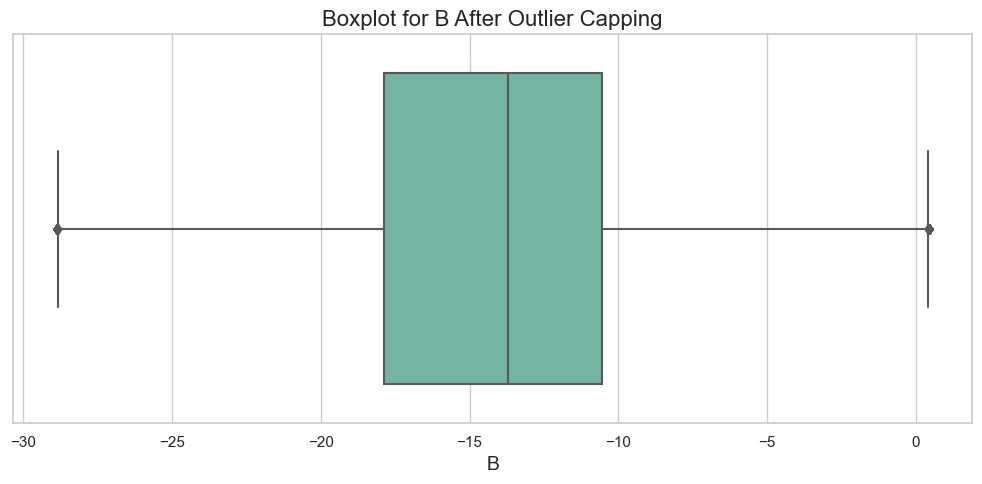

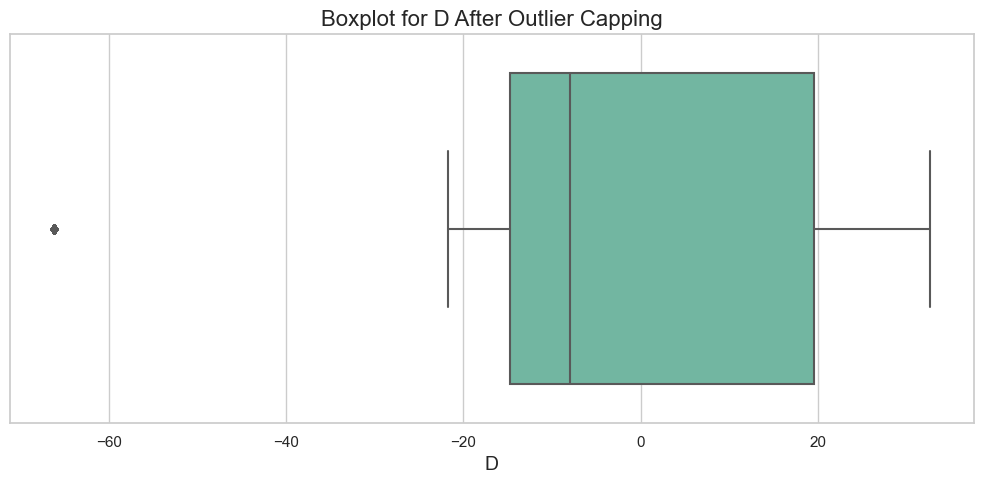

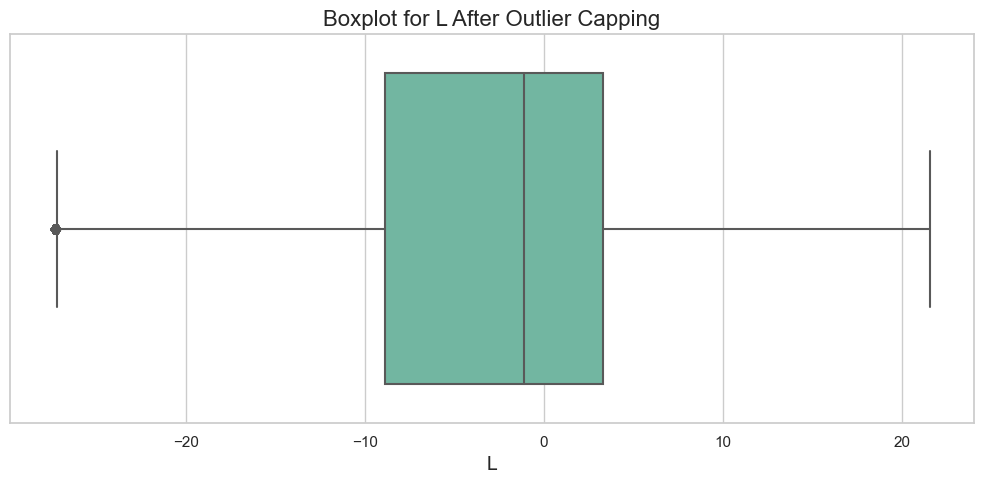

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def cap_outliers_for_specific_columns(file_path, output_path, chunksize=100000):
    """
    Cap outliers specifically for columns B, D, and L by capping values beyond the lower and upper bounds.
    The modified dataset is saved to a new CSV file.
    """
    try:
        # Columns with outliers to cap
        columns_to_cap = ['B', 'D', 'L']

        # Read the first chunk to determine thresholds for each column
        first_chunk = pd.read_csv(file_path, nrows=chunksize)
        thresholds = {}

        for column in columns_to_cap:
            if column in first_chunk.columns:
                q1 = first_chunk[column].quantile(0.25)
                q3 = first_chunk[column].quantile(0.75)
                iqr = q3 - q1
                lower_threshold = q1 - 1.5 * iqr
                upper_threshold = q3 + 1.5 * iqr
                thresholds[column] = (lower_threshold, upper_threshold)

                # Log the bounds for reference
                print(f"Column {column}: Lower bound = {lower_threshold}, Upper bound = {upper_threshold}")

                # Count values that are outliers before capping
                below_outliers = (first_chunk[column] < lower_threshold).sum()
                above_outliers = (first_chunk[column] > upper_threshold).sum()
                print(f"{column}: {below_outliers} values below lower bound, {above_outliers} values above upper bound")

        # Prepare list to hold modified chunks
        modified_chunks = []

        # Process CSV file in chunks and apply capping using calculated thresholds
        for chunk in pd.read_csv(file_path, chunksize=chunksize):
            for column, (lower_threshold, upper_threshold) in thresholds.items():
                if column in chunk.columns:
                    # Cap the outliers
                    chunk[column] = np.where(chunk[column] < lower_threshold, lower_threshold, chunk[column])
                    chunk[column] = np.where(chunk[column] > upper_threshold, upper_threshold, chunk[column])

            # Append the modified chunk to the list
            modified_chunks.append(chunk)

        # Concatenate all chunks and save the modified dataset
        modified_data = pd.concat(modified_chunks, ignore_index=True)
        modified_data.to_csv(output_path, index=False)
        print(f"\nOutlier capping complete. Modified data saved to: {output_path}")

        # Optional: Visualize capped values for columns B, D, L
        for column in columns_to_cap:
            if column in modified_data.columns:
                plt.figure(figsize=(10, 5))
                sns.set(style="whitegrid")
                sns.boxplot(x=modified_data[column], palette='Set2')
                plt.title(f'Boxplot for {column} After Outlier Capping', fontsize=16)
                plt.xlabel(column, fontsize=14)
                plt.tight_layout()
                plt.show()

    except FileNotFoundError as file_error:
        print(f"File Not Found: {file_error}. Please ensure the file path is correct.")
    except pd.errors.EmptyDataError as empty_error:
        print(f"Empty Data Error: {empty_error}. The file is empty.")
    except KeyError as key_error:
        print(f"Key Error: {key_error}. Check the column names, especially for columns B, D, L.")
    except Exception as unexpected_error:
        print(f"An unexpected error occurred: {unexpected_error}")

# Usage
file_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"
output_path = r"/Users/chethanharinath/Documents/DPA/data_public_capped.csv(1)"
cap_outliers_for_specific_columns(file_path, output_path)


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
input_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"  # Updated to your path
data = pd.read_csv(input_path)

# Columns to be processed for potential outliers
columns_to_check = ['B', 'D', 'L']  # Columns that might contain outliers

# Function to handle outliers for specific columns
def cap_outliers(df, columns):
    """
    Detect and cap outliers for specific columns in the DataFrame.
    """
    for column in columns:
        if column not in df.columns:
            print(f"Column {column} not found in the dataset.")
            continue

        # Calculate first quartile, third quartile, and interquartile range (IQR)
        q1, q3 = df[column].quantile([0.25, 0.75])
        iqr = q3 - q1

        # Define lower and upper bounds for capping outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers before capping
        below_count = df[df[column] < lower_bound].shape[0]
        above_count = df[df[column] > upper_bound].shape[0]
        print(f"Before capping - Column {column}: {below_count} below lower threshold, {above_count} above upper threshold")

        # Cap outlier values using np.clip to ensure they fall within the specified bounds
        df[column] = np.clip(df[column], lower_bound, upper_bound)

        # Identify outliers after capping
        below_count_after = df[df[column] < lower_bound].shape[0]
        above_count_after = df[df[column] > upper_bound].shape[0]
        print(f"After capping - Column {column}: {below_count_after} below lower threshold, {above_count_after} above upper threshold")

    return df

# Apply the function to handle outliers for the specified columns
cleaned_data = cap_outliers(data, columns_to_check)

print("\nOutlier handling complete. Cleaned data stored in variable 'cleaned_data'.")


Before capping - Column B: 199906 below lower threshold, 391 above upper threshold
After capping - Column B: 0 below lower threshold, 0 above upper threshold
Before capping - Column D: 200103 below lower threshold, 0 above upper threshold
After capping - Column D: 0 below lower threshold, 0 above upper threshold
Before capping - Column L: 198365 below lower threshold, 0 above upper threshold
After capping - Column L: 0 below lower threshold, 0 above upper threshold

Outlier handling complete. Cleaned data stored in variable 'cleaned_data'.


Before capping - Column A: 0 below lower threshold, 0 above upper threshold
After capping - Column A: 0 below lower threshold, 0 above upper threshold
Before capping - Column B: 199906 below lower threshold, 391 above upper threshold
After capping - Column B: 0 below lower threshold, 0 above upper threshold
Before capping - Column C: 0 below lower threshold, 0 above upper threshold
After capping - Column C: 0 below lower threshold, 0 above upper threshold
Before capping - Column D: 200103 below lower threshold, 0 above upper threshold
After capping - Column D: 0 below lower threshold, 0 above upper threshold
Before capping - Column E: 0 below lower threshold, 0 above upper threshold
After capping - Column E: 0 below lower threshold, 0 above upper threshold
Before capping - Column F: 0 below lower threshold, 0 above upper threshold
After capping - Column F: 0 below lower threshold, 0 above upper threshold
Before capping - Column G: 0 below lower threshold, 0 above upper threshold
After 

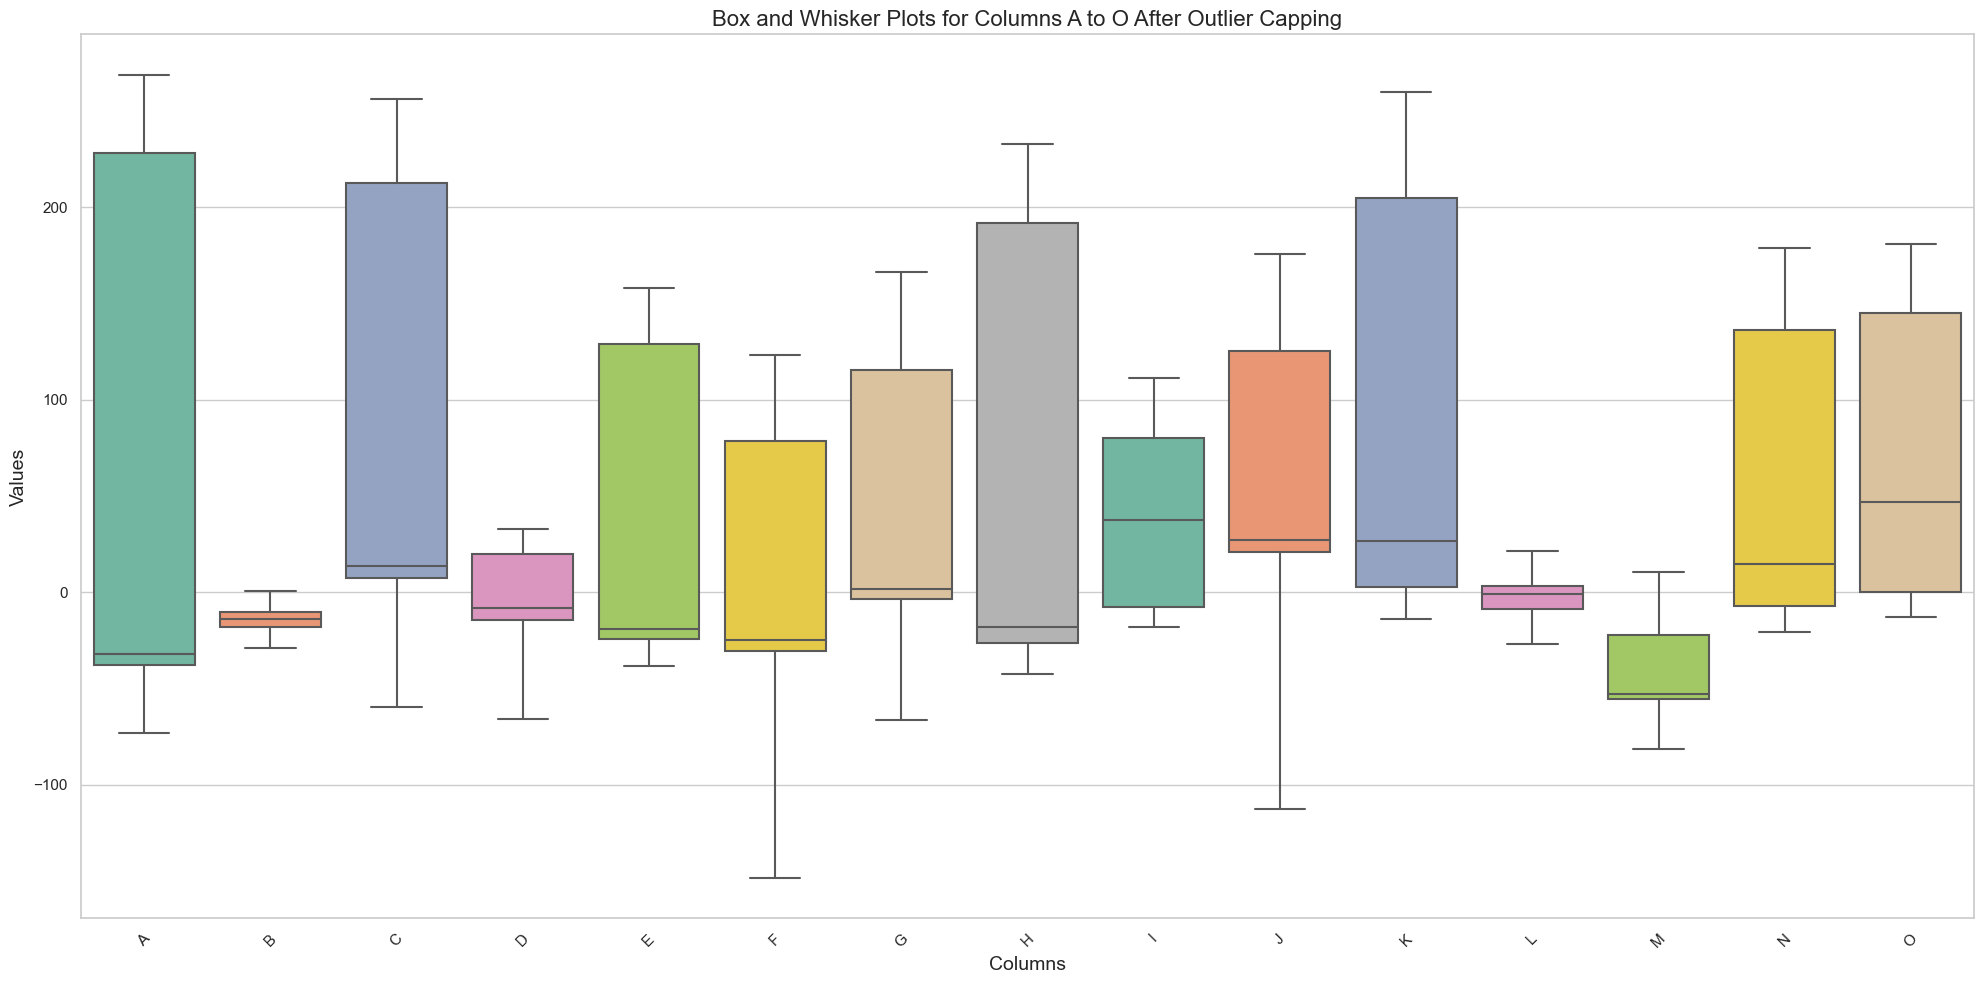


Box plot for columns A to O displayed after outlier capping.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
input_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"  # Updated to your path
data = pd.read_csv(input_path)

# Columns A to O to be processed and visualized
columns_to_process = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Function to handle outliers for specific columns
def cap_outliers(df, columns):
    """
    Detect, count, and cap outliers for specific columns in the DataFrame.
    """
    for column in columns:
        if column not in df.columns:
            print(f"Column {column} not found in the dataset.")
            continue

        # Calculate first quartile, third quartile, and interquartile range (IQR)
        q1, q3 = df[column].quantile([0.25, 0.75])
        iqr = q3 - q1

        # Define lower and upper bounds for capping outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers before capping
        below_count = (df[column] < lower_bound).sum()
        above_count = (df[column] > upper_bound).sum()
        print(f"Before capping - Column {column}: {below_count} below lower threshold, {above_count} above upper threshold")

        # Cap outlier values using np.clip to ensure they fall within the specified bounds
        df[column] = np.clip(df[column], lower_bound, upper_bound)

        # Identify outliers after capping to confirm they have been capped correctly
        below_count_after = (df[column] < lower_bound).sum()
        above_count_after = (df[column] > upper_bound).sum()
        print(f"After capping - Column {column}: {below_count_after} below lower threshold, {above_count_after} above upper threshold")

    return df

# Apply the function to handle outliers for the specified columns
cleaned_data = cap_outliers(data, columns_to_process)

# Plot box plots for all numeric columns from A to O after outlier capping
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

# Create box plot for the available columns (from A to O)
available_columns = [col for col in columns_to_process if col in cleaned_data.columns]
sns.boxplot(data=cleaned_data[available_columns], palette='Set2')
plt.title('Box and Whisker Plots for Columns A to O After Outlier Capping', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nBox plot for columns A to O displayed after outlier capping.")


In [20]:
summary = cleaned_data.describe
print(summary)

<bound method NDFrame.describe of                   A          B           C          D           E           F  \
0        231.420023 -12.210984  217.624839 -15.611916  140.047185   76.904999   
1        -38.019270 -14.195695    9.583547  22.293822  -25.578283  -18.373955   
2        -39.197085 -20.418850   21.023083  19.790280  -25.902587  -19.189004   
3        221.630408  -5.785352  216.725322  -9.900781  126.795177   85.122288   
4        228.558412 -12.447710  204.637218 -13.277704  138.930529   91.101870   
...             ...        ...         ...        ...         ...         ...   
1199995  -24.786494 -10.521166   15.328284  17.262938  -27.448018  -31.558757   
1199996  -39.555214 -14.965132   18.463720  18.127835  -26.634431  -24.569557   
1199997  223.972417 -17.367537  213.833218 -11.930115  127.344101   88.436019   
1199998  -58.147084 -28.832632  -42.593154 -66.120506  -10.619619 -119.306608   
1199999  249.063156  -6.378220  212.761858 -15.055532  124.103066   85.6082

Before capping - Column A: 0 below lower threshold, 0 above upper threshold
After capping - Column A: 0 below lower threshold, 0 above upper threshold
Before capping - Column B: 199906 below lower threshold, 391 above upper threshold
After capping - Column B: 0 below lower threshold, 0 above upper threshold
Before capping - Column C: 0 below lower threshold, 0 above upper threshold
After capping - Column C: 0 below lower threshold, 0 above upper threshold
Before capping - Column D: 200103 below lower threshold, 0 above upper threshold
After capping - Column D: 0 below lower threshold, 0 above upper threshold
Before capping - Column E: 0 below lower threshold, 0 above upper threshold
After capping - Column E: 0 below lower threshold, 0 above upper threshold
Before capping - Column F: 0 below lower threshold, 0 above upper threshold
After capping - Column F: 0 below lower threshold, 0 above upper threshold
Before capping - Column G: 0 below lower threshold, 0 above upper threshold
After 

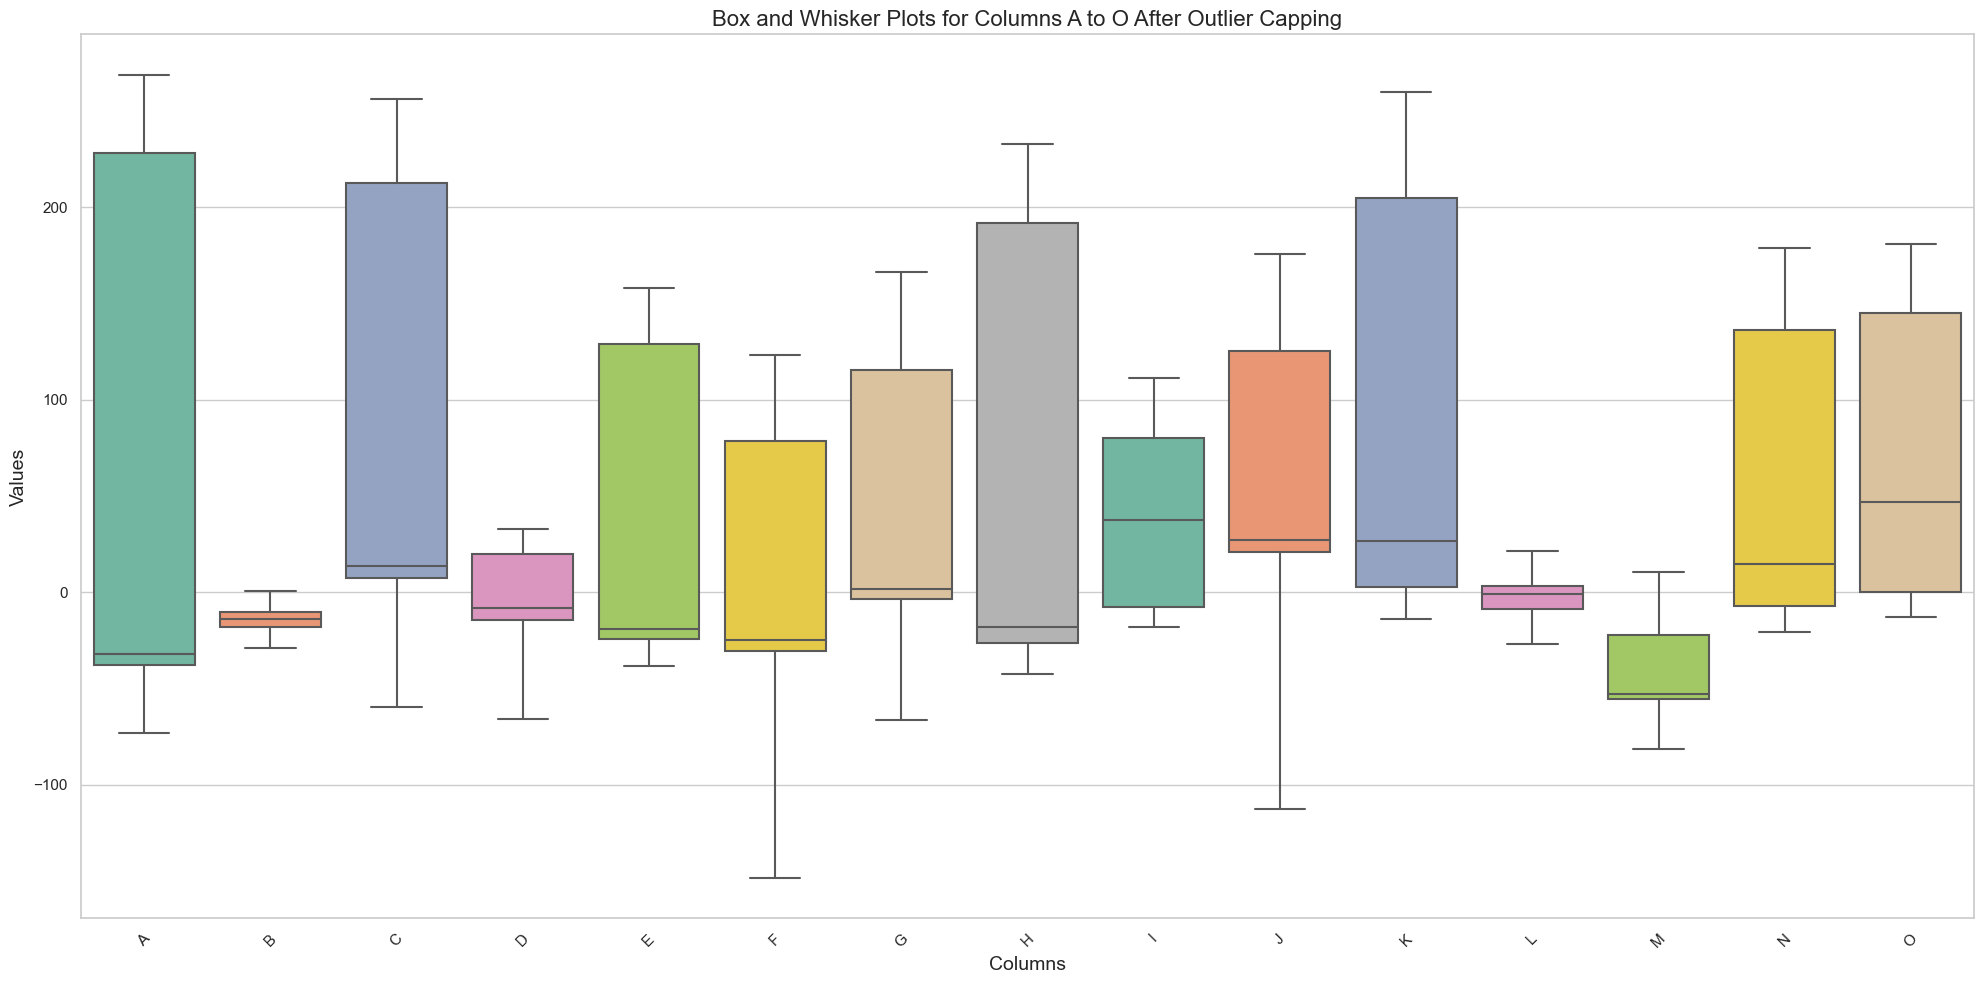


Box plot for columns A to O displayed after outlier capping.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
input_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)" # Updated to your path
data = pd.read_csv(input_path)

# Columns A to O to be processed and visualized
columns_to_process = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Function to handle outliers for specific columns
def cap_outliers(df, columns):
    """
    Detect, count, and cap outliers for specific columns in the DataFrame.
    """
    outlier_summary = {}

    for column in columns:
        if column not in df.columns:
            print(f"Column {column} not found in the dataset.")
            continue

        # Calculate first quartile, third quartile, and interquartile range (IQR)
        q1, q3 = df[column].quantile([0.25, 0.75])
        iqr = q3 - q1

        # Define lower and upper bounds for capping outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers before capping
        below_count = (df[column] < lower_bound).sum()
        above_count = (df[column] > upper_bound).sum()
        print(f"Before capping - Column {column}: {below_count} below lower threshold, {above_count} above upper threshold")

        # Cap outlier values using np.clip to ensure they fall within the specified bounds
        df[column] = np.clip(df[column], lower_bound, upper_bound)

        # Identify outliers after capping to confirm they have been capped correctly
        below_count_after = (df[column] < lower_bound).sum()
        above_count_after = (df[column] > upper_bound).sum()
        print(f"After capping - Column {column}: {below_count_after} below lower threshold, {above_count_after} above upper threshold")

        # Store the summary of outliers after handling
        outlier_summary[column] = {
            "below_threshold_after": below_count_after,
            "above_threshold_after": above_count_after
        }

    # Print outlier counts after handling for all columns
    print("\nOutlier Summary After Capping:")
    for column, counts in outlier_summary.items():
        print(f"Column {column}: {counts['below_threshold_after']} below threshold, {counts['above_threshold_after']} above threshold")

    return df

# Apply the function to handle outliers for the specified columns
cleaned_data = cap_outliers(data, columns_to_process)

# Plot box plots for all numeric columns from A to O after outlier capping
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

# Create box plot for the available columns (from A to O)
available_columns = [col for col in columns_to_process if col in cleaned_data.columns]
sns.boxplot(data=cleaned_data[available_columns], palette='Set2')
plt.title('Box and Whisker Plots for Columns A to O After Outlier Capping', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nBox plot for columns A to O displayed after outlier capping.")


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'cleaned_data' is already available after capping outliers for columns A to O

# Columns A to O to be normalized and scaled
columns_to_transform = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Ensure columns exist in cleaned_data
available_columns = [col for col in columns_to_transform if col in cleaned_data.columns]

# Create a copy of the cleaned data to work on transformations
transformed_data = cleaned_data.copy()

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMax scaling
transformed_data[available_columns] = min_max_scaler.fit_transform(transformed_data[available_columns])
print("\nData after MinMax Scaling:")
print(transformed_data[available_columns].describe())

# Apply Standard scaling (Normalization)
normalized_data = standard_scaler.fit_transform(transformed_data[available_columns])
normalized_df = pd.DataFrame(normalized_data, columns=available_columns)

# Add back other non-transformed columns (if any) from cleaned_data
for col in cleaned_data.columns:
    if col not in available_columns:
        normalized_df[col] = cleaned_data[col]

# Print summary of the normalized data
print("\nSummary of the Normalized Data:")
print(normalized_df.describe())

# Provide insights about each step
print("\nNormalization and scaling complete. Summary statistics for normalized and scaled data have been provided above.")



Data after MinMax Scaling:
                  A             B             C             D             E  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean   3.620628e-01  4.597899e-01  4.157984e-01  6.110091e-01  3.451150e-01   
std    3.780730e-01  2.407314e-01  3.332742e-01  3.126815e-01  3.710100e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.028265e-01  3.750000e-01  2.129853e-01  5.205338e-01  7.099663e-02   
50%    1.202555e-01  5.175296e-01  2.317723e-01  5.884678e-01  9.846867e-02   
75%    8.807365e-01  6.250000e-01  8.612657e-01  8.675564e-01  8.518335e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                  F             G             H             I             J  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean   5.244976e-01  4.225513e-01  3.398052e-01  3.953138e-01  5.324663e-01   
std    2.692015e-01  2.

In [23]:
normalized_df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,1.398333,0.451196,1.386800,-0.318451,1.518831,1.136805,1.499176,1.421937,1.182621,1.123217,1.531100,-0.106005,1.542774,1.390885,1.402222,3
1,-0.686316,0.169260,-0.589262,0.909069,-0.755534,-0.166762,-0.477999,-0.820431,-0.980689,-0.222670,-0.792750,0.662984,-0.949550,-0.909245,-0.875843,2
2,-0.695429,-0.714762,-0.480605,0.827995,-0.759987,-0.177913,-0.520931,-0.739075,-0.939343,-0.190270,-0.774695,0.958485,-0.815240,-0.805046,-0.910959,2
3,1.322591,1.363981,1.378256,-0.133505,1.336854,1.249231,1.157837,1.416902,1.175193,1.509929,1.408750,0.101215,1.499253,1.274864,1.338920,3
4,1.376193,0.417568,1.263438,-0.242861,1.503497,1.331041,1.259054,1.529661,1.350708,1.161552,1.290718,0.280061,1.518267,1.469607,1.313165,3


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'cleaned_data' is already available after capping outliers for columns A to O

# Columns A to O to be scaled
columns_to_transform = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Ensure columns exist in cleaned_data
available_columns = [col for col in columns_to_transform if col in cleaned_data.columns]

# Create a copy of the cleaned data to work on transformations
scaled_data = cleaned_data.copy()

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Standard scaling (Normalization) to columns A to O
scaled_data[available_columns] = standard_scaler.fit_transform(scaled_data[available_columns])

# Display the first few rows of the scaled data
print("\nFirst few rows of the Standard Scaled Data:")
print(scaled_data[available_columns].head())

# Provide insights about each step
print("\nStandard scaling complete. First few rows of scaled data displayed above.")



First few rows of the Standard Scaled Data:
          A         B         C         D         E         F         G  \
0  1.398333  0.451196  1.386800 -0.318451  1.518831  1.136805  1.499176   
1 -0.686316  0.169260 -0.589262  0.909069 -0.755534 -0.166762 -0.477999   
2 -0.695429 -0.714762 -0.480605  0.827995 -0.759987 -0.177913 -0.520931   
3  1.322591  1.363981  1.378256 -0.133505  1.336854  1.249231  1.157837   
4  1.376193  0.417568  1.263438 -0.242861  1.503497  1.331041  1.259054   

          H         I         J         K         L         M         N  \
0  1.421937  1.182621  1.123217  1.531100 -0.106005  1.542774  1.390885   
1 -0.820431 -0.980689 -0.222670 -0.792750  0.662984 -0.949550 -0.909245   
2 -0.739075 -0.939343 -0.190270 -0.774695  0.958485 -0.815240 -0.805046   
3  1.416902  1.175193  1.509929  1.408750  0.101215  1.499253  1.274864   
4  1.529661  1.350708  1.161552  1.290718  0.280061  1.518267  1.469607   

          O  
0  1.402222  
1 -0.875843  
2 -0.910959

In [25]:
scaled_data.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,1.398333,0.451196,1.386800,-0.318451,1.518831,1.136805,1.499176,1.421937,1.182621,1.123217,1.531100,-0.106005,1.542774,1.390885,1.402222,3
1,-0.686316,0.169260,-0.589262,0.909069,-0.755534,-0.166762,-0.477999,-0.820431,-0.980689,-0.222670,-0.792750,0.662984,-0.949550,-0.909245,-0.875843,2
2,-0.695429,-0.714762,-0.480605,0.827995,-0.759987,-0.177913,-0.520931,-0.739075,-0.939343,-0.190270,-0.774695,0.958485,-0.815240,-0.805046,-0.910959,2
3,1.322591,1.363981,1.378256,-0.133505,1.336854,1.249231,1.157837,1.416902,1.175193,1.509929,1.408750,0.101215,1.499253,1.274864,1.338920,3
4,1.376193,0.417568,1.263438,-0.242861,1.503497,1.331041,1.259054,1.529661,1.350708,1.161552,1.290718,0.280061,1.518267,1.469607,1.313165,3


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'cleaned_data' is already available after capping outliers for columns A to O

# Columns A to O to be scaled
columns_to_transform = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Ensure columns exist in cleaned_data
available_columns = [col for col in columns_to_transform if col in cleaned_data.columns]

# Create a copy of the cleaned data to work on transformations
scaled_data = cleaned_data.copy()

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Standard scaling (Normalization) to columns A to O
scaled_data[available_columns] = standard_scaler.fit_transform(scaled_data[available_columns])

# Display the first few rows of the scaled data
print(scaled_data.head())

# Calculate and print the correlation matrix for scaled data
correlation_matrix = scaled_data.corr()

print("\nCorrelation Matrix for the Scaled Data:")
print(correlation_matrix)


          A         B         C         D         E         F         G  \
0  1.398333  0.451196  1.386800 -0.318451  1.518831  1.136805  1.499176   
1 -0.686316  0.169260 -0.589262  0.909069 -0.755534 -0.166762 -0.477999   
2 -0.695429 -0.714762 -0.480605  0.827995 -0.759987 -0.177913 -0.520931   
3  1.322591  1.363981  1.378256 -0.133505  1.336854  1.249231  1.157837   
4  1.376193  0.417568  1.263438 -0.242861  1.503497  1.331041  1.259054   

          H         I         J         K         L         M         N  \
0  1.421937  1.182621  1.123217  1.531100 -0.106005  1.542774  1.390885   
1 -0.820431 -0.980689 -0.222670 -0.792750  0.662984 -0.949550 -0.909245   
2 -0.739075 -0.939343 -0.190270 -0.774695  0.958485 -0.815240 -0.805046   
3  1.416902  1.175193  1.509929  1.408750  0.101215  1.499253  1.274864   
4  1.529661  1.350708  1.161552  1.290718  0.280061  1.518267  1.469607   

          O  Class  
0  1.402222      3  
1 -0.875843      2  
2 -0.910959      2  
3  1.338920   

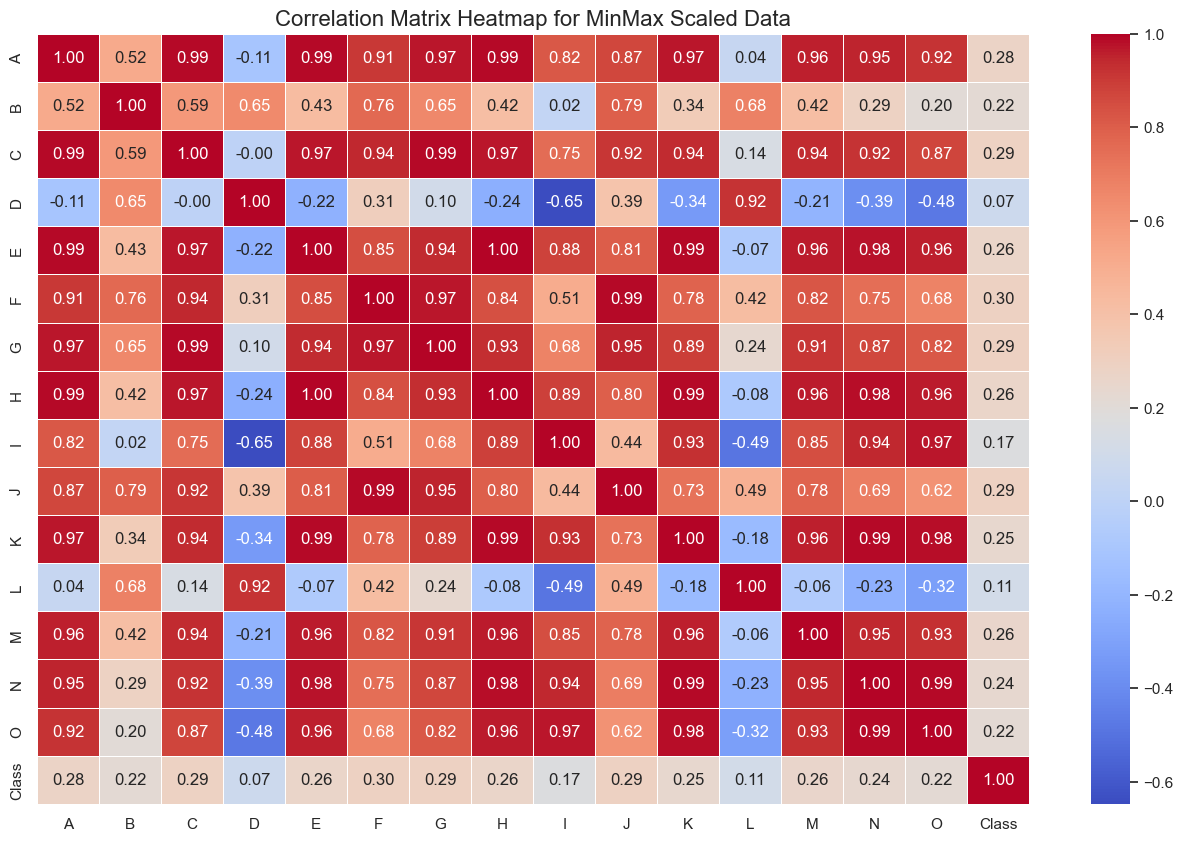

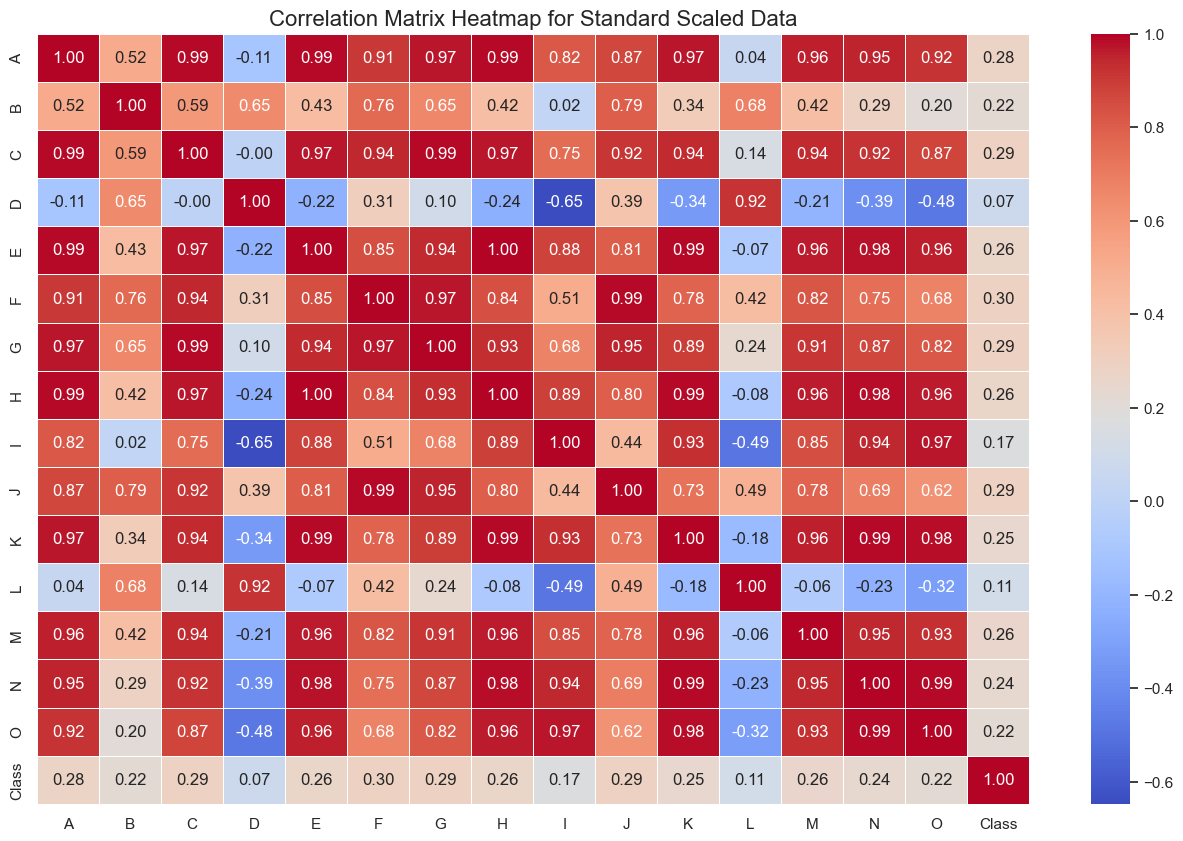

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'cleaned_data' is already available after capping outliers for columns A to O

# Columns A to O to be scaled
columns_to_transform = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Ensure columns exist in cleaned_data
available_columns = [col for col in columns_to_transform if col in cleaned_data.columns]

# Create copies of cleaned data for transformations
minmax_scaled_data = cleaned_data.copy()
standard_scaled_data = cleaned_data.copy()

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMax scaling to columns A to O
minmax_scaled_data[available_columns] = min_max_scaler.fit_transform(minmax_scaled_data[available_columns])

# Apply Standard scaling (Normalization) to columns A to O
standard_scaled_data[available_columns] = standard_scaler.fit_transform(standard_scaled_data[available_columns])

# Calculate the correlation matrix for the MinMax scaled data
minmax_correlation_matrix = minmax_scaled_data.corr()

# Calculate the correlation matrix for the Standard scaled data
standard_correlation_matrix = standard_scaled_data.corr()

# Visualize the MinMax Scaled Data Correlation Matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(minmax_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap for MinMax Scaled Data', fontsize=16)
plt.show()

# Visualize the Standard Scaled Data Correlation Matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(standard_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap for Standard Scaled Data', fontsize=16)
plt.show()


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'cleaned_data' is already available after capping outliers for columns A to O

# Columns A to O to be scaled
columns_to_transform = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Ensure columns exist in cleaned_data
available_columns = [col for col in columns_to_transform if col in cleaned_data.columns]

# Create a copy of the cleaned data to work on transformations
scaled_data = cleaned_data.copy()

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Standard scaling (Normalization) to columns A to O
scaled_data[available_columns] = standard_scaler.fit_transform(scaled_data[available_columns])

# Define different thresholds for high correlation
correlation_thresholds = [0.75, 0.80, 0.85, 0.90, 0.95]

# Iterate over each threshold to calculate the correlation matrix, drop highly correlated features, and print the summary
for threshold in correlation_thresholds:
    # Calculate the correlation matrix for the scaled data
    correlation_matrix = scaled_data.corr()

    # Identify highly correlated pairs using the upper triangle of the matrix
    upper_triangle_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Find pairs with a high correlation (above the threshold)
    high_corr_pairs = [(column, row) for column in upper_triangle_matrix.columns for row in upper_triangle_matrix.index 
                       if abs(upper_triangle_matrix.loc[row, column]) > threshold]

    # Set to keep track of features that have been removed
    removed_features = set()

    # Drop one feature from each highly correlated pair
    for col1, col2 in high_corr_pairs:
        if col1 not in removed_features and col2 not in removed_features:
            # Drop one of the features and add it to the removed list
            removed_features.add(col2)

    # Drop the features that were marked for removal
    reduced_data = scaled_data.drop(columns=list(removed_features))

    # Print the summary of features removed for the current threshold
    print(f"Correlation Threshold: {threshold}")
    print(f"Features removed due to high correlation: {removed_features}")
    print(f"Number of features remaining after reduction: {reduced_data.shape[1]}")
    print("-" * 20)


Correlation Threshold: 0.75
Features removed due to high correlation: {'G', 'J', 'K', 'B', 'F', 'A', 'H', 'I', 'D', 'M', 'N', 'C', 'E'}
Number of features remaining after reduction: 3
--------------------
Correlation Threshold: 0.8
Features removed due to high correlation: {'G', 'K', 'A', 'F', 'I', 'H', 'D', 'M', 'N', 'C', 'E'}
Number of features remaining after reduction: 5
--------------------
Correlation Threshold: 0.85
Features removed due to high correlation: {'G', 'K', 'A', 'F', 'I', 'H', 'D', 'M', 'N', 'C', 'E'}
Number of features remaining after reduction: 5
--------------------
Correlation Threshold: 0.9
Features removed due to high correlation: {'G', 'K', 'A', 'F', 'I', 'H', 'D', 'M', 'N', 'C', 'E'}
Number of features remaining after reduction: 5
--------------------
Correlation Threshold: 0.95
Features removed due to high correlation: {'K', 'A', 'F', 'I', 'H', 'N', 'C', 'E'}
Number of features remaining after reduction: 8
--------------------


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, f_classif

# Assuming 'cleaned_data' is already available after capping outliers for columns A to O
# Assuming 'Class' is the label/target column

# Columns A to O to be scaled
columns_to_transform = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Ensure columns exist in cleaned_data
available_columns = [col for col in columns_to_transform if col in cleaned_data.columns]

# Define the target variable (assuming 'Class' is the target column)
target = cleaned_data['Class']

# Create a copy of the cleaned data without the target column to work on transformations
features = cleaned_data[available_columns].copy()

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Standard scaling (Normalization) to columns A to O
scaled_data = features.copy()
scaled_data[available_columns] = standard_scaler.fit_transform(features[available_columns])

# Define different thresholds for high correlation
correlation_thresholds = [0.75, 0.80, 0.85, 0.90, 0.95]

# Iterate over each threshold to calculate the correlation matrix, drop highly correlated features, and compute scores
for threshold in correlation_thresholds:
    # Calculate the correlation matrix for the scaled data
    correlation_matrix = scaled_data.corr().abs()

    # Identify highly correlated pairs using the upper triangle of the matrix
    upper_triangle_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Find pairs with a high correlation (above the threshold)
    high_corr_pairs = [(column, row) for column in upper_triangle_matrix.columns for row in upper_triangle_matrix.index 
                       if upper_triangle_matrix.loc[row, column] > threshold]

    # Set to keep track of features that have been removed
    removed_features = set()

    # Drop one feature from each highly correlated pair
    for col1, col2 in high_corr_pairs:
        if col1 not in removed_features and col2 not in removed_features:
            removed_features.add(col2)  # Remove one of the correlated features

    # Drop the features that were marked for removal
    reduced_data = scaled_data.drop(columns=list(removed_features))

    # Compute Mutual Information Scores
    mi_scores = mutual_info_classif(reduced_data, target)
    mi_scores_series = pd.Series(mi_scores, index=reduced_data.columns)
    mi_scores_series_sorted = mi_scores_series.sort_values(ascending=False).head(5)

    # Compute ANOVA F-Test Scores
    f_values, _ = f_classif(reduced_data, target)
    f_scores_series = pd.Series(f_values, index=reduced_data.columns)
    f_scores_series_sorted = f_scores_series.sort_values(ascending=False).head(5)

    # Print the summary of feature removal and scores
    print(f"Correlation Threshold: {threshold}")
    print(f"Features removed due to high correlation: {removed_features}")
    print(f"Number of features remaining after removal: {reduced_data.shape[1]}")
    print(f"Top 5 Features by Mutual Information Score:\n{mi_scores_series_sorted}")
    print(f"Mutual Information Scores (Top 5):\n{mi_scores_series_sorted.to_dict()}")
    print(f"Top 5 Features by ANOVA F-Test Score:\n{f_scores_series_sorted}")
    print(f"ANOVA F-Test Scores (Top 5):\n{f_scores_series_sorted.to_dict()}")
    print("-" * 20)


Correlation Threshold: 0.75
Features removed due to high correlation: {'G', 'J', 'K', 'B', 'F', 'A', 'H', 'I', 'D', 'M', 'N', 'C', 'E'}
Number of features remaining after removal: 2
Top 5 Features by Mutual Information Score:
O    0.443705
L    0.271206
dtype: float64
Mutual Information Scores (Top 5):
{'O': 0.44370470134681184, 'L': 0.2712060661803213}
Top 5 Features by ANOVA F-Test Score:
O    551881.746850
L    354149.652231
dtype: float64
ANOVA F-Test Scores (Top 5):
{'O': 551881.7468504021, 'L': 354149.6522313899}
--------------------
Correlation Threshold: 0.8
Features removed due to high correlation: {'G', 'K', 'A', 'F', 'I', 'H', 'D', 'M', 'N', 'C', 'E'}
Number of features remaining after removal: 4
Top 5 Features by Mutual Information Score:
O    0.443702
J    0.442818
L    0.271163
B    0.171602
dtype: float64
Mutual Information Scores (Top 5):
{'O': 0.4437024485076697, 'J': 0.44281833842327045, 'L': 0.27116333197786324, 'B': 0.1716022051079953}
Top 5 Features by ANOVA F-Test

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'cleaned_data' is already available after capping outliers for columns A to O

# Columns A to O to be scaled
columns_to_transform = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Ensure columns exist in cleaned_data
available_columns = [col for col in columns_to_transform if col in cleaned_data.columns]

# Create a copy of the cleaned data to work on transformations
scaled_data = cleaned_data.copy()

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Standard scaling (Normalization) to columns A to O
scaled_data[available_columns] = standard_scaler.fit_transform(scaled_data[available_columns])

# Define different thresholds for high correlation
correlation_thresholds = [0.75, 0.80, 0.85, 0.90, 0.95]

# Iterate over each threshold to calculate the correlation matrix and identify correlated features
for threshold in correlation_thresholds:
    # Calculate the correlation matrix for the scaled data
    correlation_matrix = scaled_data.corr().abs()

    # Identify highly correlated pairs using the upper triangle of the matrix
    upper_triangle_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Set to keep track of features that are highly correlated for the current threshold
    correlated_features = set()

    # Find pairs with a high correlation (above the threshold)
    high_corr_pairs = [(column, row) for column in upper_triangle_matrix.columns for row in upper_triangle_matrix.index 
                       if upper_triangle_matrix.loc[row, column] > threshold]

    # Add each pair's features to the correlated set
    for col1, col2 in high_corr_pairs:
        correlated_features.add(col1)
        correlated_features.add(col2)

    # Print the correlated features for the current threshold
    print(f"Correlated features for threshold {threshold}: {correlated_features}")


Correlated features for threshold 0.75: {'G', 'J', 'K', 'B', 'F', 'A', 'H', 'I', 'L', 'D', 'M', 'N', 'C', 'O', 'E'}
Correlated features for threshold 0.8: {'G', 'J', 'K', 'A', 'F', 'I', 'H', 'L', 'D', 'M', 'N', 'C', 'O', 'E'}
Correlated features for threshold 0.85: {'G', 'J', 'K', 'A', 'F', 'I', 'H', 'L', 'D', 'M', 'N', 'C', 'O', 'E'}
Correlated features for threshold 0.9: {'G', 'J', 'K', 'A', 'F', 'I', 'H', 'L', 'D', 'M', 'N', 'C', 'O', 'E'}
Correlated features for threshold 0.95: {'G', 'J', 'K', 'A', 'F', 'I', 'H', 'M', 'N', 'C', 'O', 'E'}


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the dataset
input_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)" # Updated to your given path
cleaned_data = pd.read_csv(input_path)

# Columns A to O to be scaled
columns_to_transform = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Ensure columns exist in cleaned_data
available_columns = [col for col in columns_to_transform if col in cleaned_data.columns]

# Create a copy of the cleaned data to work on transformations
scaled_data = cleaned_data.copy()

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Standard scaling (Normalization) to columns A to O
scaled_data[available_columns] = standard_scaler.fit_transform(scaled_data[available_columns])

# Define different thresholds for high correlation
correlation_thresholds = [0.75, 0.80, 0.85, 0.90, 0.95]

# Calculate the correlation matrix
corr_matrix = scaled_data.corr().abs()

# Initialize a dictionary to store the correlated features by threshold
correlated_features_by_threshold = {}

# Iterate through each threshold to find highly correlated features
for threshold in correlation_thresholds:
    correlated_features = set()

    # Iterate through the correlation matrix to find highly correlated feature pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)

    # Store the features for the current threshold
    correlated_features_by_threshold[threshold] = correlated_features

# Print the correlated features for each threshold
for threshold, features in correlated_features_by_threshold.items():
    print(f"Correlated features for threshold {threshold}: {features}")

# Initialize a dictionary to store interaction features by threshold
interaction_features_by_threshold = {}

# Iterate through each threshold and generate interaction features
for threshold, features in correlated_features_by_threshold.items():
    # Check if there are features to generate interactions
    if len(features) > 1:
        # Subset the data for the correlated features
        X_corr = scaled_data[list(features)]

        # Initialize PolynomialFeatures for interaction terms (degree=2, interaction_only=True)
        poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

        # Generate interaction terms
        X_interactions = poly.fit_transform(X_corr)

        # Create a DataFrame for the interaction features
        interaction_columns = poly.get_feature_names_out(list(features))
        X_interactions_df = pd.DataFrame(X_interactions, columns=interaction_columns, index=X_corr.index)

        # Store the interaction features for the current threshold
        interaction_features_by_threshold[threshold] = X_interactions_df

        # Print the generated interaction features for the current threshold
        print(f"Generated interaction features for threshold {threshold}: {X_interactions_df.columns.tolist()}")
    else:
        print(f"No interaction features generated for threshold {threshold} due to insufficient correlated features.")

# Optional: Display the first few rows of interaction features for the last threshold
for threshold, interaction_df in interaction_features_by_threshold.items():
    print(f"\nInteraction features for threshold {threshold}:")
    print(interaction_df.head())


Correlated features for threshold 0.75: {'G', 'J', 'K', 'I', 'F', 'L', 'H', 'D', 'M', 'N', 'C', 'O', 'E'}
Correlated features for threshold 0.8: {'G', 'J', 'K', 'I', 'F', 'L', 'H', 'D', 'M', 'N', 'C', 'O', 'E'}
Correlated features for threshold 0.85: {'G', 'J', 'K', 'I', 'F', 'L', 'H', 'D', 'M', 'N', 'C', 'O', 'E'}
Correlated features for threshold 0.9: {'G', 'J', 'K', 'F', 'L', 'H', 'M', 'N', 'C', 'O', 'E'}
Correlated features for threshold 0.95: {'G', 'J', 'K', 'H', 'M', 'N', 'C', 'O', 'E'}
Generated interaction features for threshold 0.75: ['G', 'J', 'K', 'I', 'F', 'L', 'H', 'D', 'M', 'N', 'C', 'O', 'E', 'G J', 'G K', 'G I', 'G F', 'G L', 'G H', 'G D', 'G M', 'G N', 'G C', 'G O', 'G E', 'J K', 'J I', 'J F', 'J L', 'J H', 'J D', 'J M', 'J N', 'J C', 'J O', 'J E', 'K I', 'K F', 'K L', 'K H', 'K D', 'K M', 'K N', 'K C', 'K O', 'K E', 'I F', 'I L', 'I H', 'I D', 'I M', 'I N', 'I C', 'I O', 'I E', 'F L', 'F H', 'F D', 'F M', 'F N', 'F C', 'F O', 'F E', 'L H', 'L D', 'L M', 'L N', 'L C', 

In [32]:
# Step 1: Calculate the frequency of occurrence for each interaction across thresholds
interaction_frequency = {}

# Iterate through the interaction features DataFrame for each threshold
for thresh, interaction_df in interaction_features_by_threshold.items():
    for interaction_feature in interaction_df.columns:
        # If the interaction feature is not in the frequency dictionary, initialize it
        if interaction_feature not in interaction_frequency:
            interaction_frequency[interaction_feature] = 0
        # Increment the frequency of the interaction feature
        interaction_frequency[interaction_feature] += 1

# Step 2: Identify and filter interactions by complexity (degree >= 2)
top_interactions_per_threshold = {}

for thresh, interaction_df in interaction_features_by_threshold.items():
    # Identify interaction features of degree >= 2 by counting words in their names
    complex_interactions = [feature for feature in interaction_df.columns if len(feature.split()) > 1]

    # Sort interactions by their overall frequency of occurrence across thresholds
    sorted_interactions = sorted(complex_interactions, key=lambda feat: interaction_frequency[feat], reverse=True)

    # Store the top interactions for each threshold
    top_interactions_per_threshold[thresh] = sorted_interactions

# Step 3: Print out the top interactions for each correlation threshold
for thresh, top_interactions in top_interactions_per_threshold.items():
    print(f"Top interactions for threshold {thresh}: {top_interactions}")


Top interactions for threshold 0.75: ['G J', 'G K', 'G H', 'G M', 'G N', 'G C', 'G O', 'G E', 'J K', 'J H', 'J M', 'J N', 'J C', 'J O', 'J E', 'K H', 'K M', 'K N', 'K C', 'K O', 'K E', 'H M', 'H N', 'H C', 'H O', 'H E', 'M N', 'M C', 'M O', 'M E', 'N C', 'N O', 'N E', 'C O', 'C E', 'O E', 'G F', 'G L', 'J F', 'J L', 'K F', 'K L', 'F L', 'F H', 'F M', 'F N', 'F C', 'F O', 'F E', 'L H', 'L M', 'L N', 'L C', 'L O', 'L E', 'G I', 'G D', 'J I', 'J D', 'K I', 'K D', 'I F', 'I L', 'I H', 'I D', 'I M', 'I N', 'I C', 'I O', 'I E', 'F D', 'L D', 'H D', 'D M', 'D N', 'D C', 'D O', 'D E']
Top interactions for threshold 0.8: ['G J', 'G K', 'G H', 'G M', 'G N', 'G C', 'G O', 'G E', 'J K', 'J H', 'J M', 'J N', 'J C', 'J O', 'J E', 'K H', 'K M', 'K N', 'K C', 'K O', 'K E', 'H M', 'H N', 'H C', 'H O', 'H E', 'M N', 'M C', 'M O', 'M E', 'N C', 'N O', 'N E', 'C O', 'C E', 'O E', 'G F', 'G L', 'J F', 'J L', 'K F', 'K L', 'F L', 'F H', 'F M', 'F N', 'F C', 'F O', 'F E', 'L H', 'L M', 'L N', 'L C', 'L O', '

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the dataset and define features and target
input_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"  # Updated to your given path
cleaned_data = pd.read_csv(input_path)

# Columns A to O to be scaled (Assuming the dataset has columns 'A' to 'O' and 'Class' as target)
columns_to_transform = [chr(i) for i in range(ord('A'), ord('P'))]  # Creates list ['A', 'B', ..., 'O']

# Define target column
target_column = 'Class'

# Define features (X) and target (y)
X = cleaned_data[columns_to_transform]
y = cleaned_data[target_column]

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=columns_to_transform)

# Step 3: Calculate correlation matrix to identify correlated features
correlation_matrix = X_scaled.corr()

# Define correlation thresholds for feature interaction analysis
corr_thresholds = [0.75, 0.80, 0.85, 0.90, 0.95]

# Dictionary to hold correlated features for each threshold
features_by_threshold = {}

# Iterate through correlation thresholds to find correlated feature pairs
for threshold in corr_thresholds:
    highly_correlated_features = set()

    # Traverse the correlation matrix to identify correlated pairs
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                highly_correlated_features.add(colname)
    
    # Store the correlated features for the current threshold
    features_by_threshold[threshold] = highly_correlated_features

# Step 4: Generate interaction features for each threshold
interactions_by_threshold = {}

for threshold, feature_set in features_by_threshold.items():
    # Check if we have features to generate interaction terms
    if len(feature_set) > 1:
        # Extract data for features identified at the given threshold
        X_selected = X_scaled[list(feature_set)]

        # Initialize PolynomialFeatures for creating interaction terms (degree=2, interaction_only=True)
        poly_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

        # Generate interaction terms
        X_interaction_terms = poly_interactions.fit_transform(X_selected)

        # Create DataFrame to hold interaction features
        interaction_feature_names = poly_interactions.get_feature_names_out(list(feature_set))
        X_interactions_df = pd.DataFrame(X_interaction_terms, columns=interaction_feature_names)

        # Store interaction features DataFrame for the current threshold
        interactions_by_threshold[threshold] = X_interactions_df

        # Print interaction feature names generated at the current threshold
        print(f"Generated interaction features for threshold {threshold}: {X_interactions_df.columns.tolist()}")

# Step 5: Count the frequency of interaction features across thresholds
interaction_frequency = {}

for threshold, interaction_df in interactions_by_threshold.items():
    for interaction_feature in interaction_df.columns:
        if interaction_feature not in interaction_frequency:
            interaction_frequency[interaction_feature] = 0
        interaction_frequency[interaction_feature] += 1

# Step 6: Filter and rank interaction features by complexity and frequency
top_interactions_by_threshold = {}

for threshold, interaction_df in interactions_by_threshold.items():
    # Identify interaction features with degree >= 2 based on name complexity
    filtered_interactions = [feature for feature in interaction_df.columns if len(feature.split()) > 1]
    
    # Sort interaction features by frequency of occurrence across thresholds
    ranked_interactions = sorted(filtered_interactions, key=lambda feat: interaction_frequency[feat], reverse=True)
    
    # Store top interactions for the current threshold
    top_interactions_by_threshold[threshold] = ranked_interactions

# Print the top interactions for each threshold
for threshold, top_interactions in top_interactions_by_threshold.items():
    print(f"Top interactions for threshold {threshold}: {top_interactions[:10]}")  # Display top 10 interactions

# Step 7: Apply dimensionality reduction using PCA
# Combine original features with the top-ranked interaction features (based on threshold 0.95)
if 0.95 in top_interactions_by_threshold and 0.95 in interactions_by_threshold:
    selected_interactions = top_interactions_by_threshold[0.95][:20]
    interaction_features_df = interactions_by_threshold[0.95][selected_interactions]
    X_combined_features = pd.concat([X_scaled, interaction_features_df], axis=1)

    # Standardize the combined features
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X_combined_features)

    # Perform PCA to retain 95% of the variance
    pca_model = PCA(n_components=0.95)
    X_pca_transformed = pca_model.fit_transform(X_standardized)

    print(f"Number of PCA components: {pca_model.n_components_}")

    # Create DataFrame for PCA-transformed features
    X_final_pca = pd.DataFrame(X_pca_transformed, columns=[f'PC_{i+1}' for i in range(pca_model.n_components_)])

    # Display final dataset details
    print("Final dataset shape:", X_final_pca.shape)
    print("Final features:", X_final_pca.columns.tolist())


Generated interaction features for threshold 0.75: ['G', 'J', 'K', 'I', 'F', 'L', 'H', 'D', 'M', 'N', 'C', 'O', 'E', 'G J', 'G K', 'G I', 'G F', 'G L', 'G H', 'G D', 'G M', 'G N', 'G C', 'G O', 'G E', 'J K', 'J I', 'J F', 'J L', 'J H', 'J D', 'J M', 'J N', 'J C', 'J O', 'J E', 'K I', 'K F', 'K L', 'K H', 'K D', 'K M', 'K N', 'K C', 'K O', 'K E', 'I F', 'I L', 'I H', 'I D', 'I M', 'I N', 'I C', 'I O', 'I E', 'F L', 'F H', 'F D', 'F M', 'F N', 'F C', 'F O', 'F E', 'L H', 'L D', 'L M', 'L N', 'L C', 'L O', 'L E', 'H D', 'H M', 'H N', 'H C', 'H O', 'H E', 'D M', 'D N', 'D C', 'D O', 'D E', 'M N', 'M C', 'M O', 'M E', 'N C', 'N O', 'N E', 'C O', 'C E', 'O E']
Generated interaction features for threshold 0.8: ['G', 'J', 'K', 'I', 'F', 'L', 'H', 'D', 'M', 'N', 'C', 'O', 'E', 'G J', 'G K', 'G I', 'G F', 'G L', 'G H', 'G D', 'G M', 'G N', 'G C', 'G O', 'G E', 'J K', 'J I', 'J F', 'J L', 'J H', 'J D', 'J M', 'J N', 'J C', 'J O', 'J E', 'K I', 'K F', 'K L', 'K H', 'K D', 'K M', 'K N', 'K C', 'K O

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Step 1: Perform Univariate Feature Selection using ANOVA F-Test
# Define the number of features to select
num_features_to_select = 16

# Initialize the SelectKBest model using f_classif as the scoring function
feature_selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Apply feature selection to obtain the best features
X_best_features = feature_selector.fit_transform(X, y)

# Retrieve the names of the selected features
selected_features = X.columns[feature_selector.get_support()]
print("Features Selected using ANOVA F-Test:", selected_features)

# Step 2: Perform Correlation Filtering with Target Variable
# Calculate the correlation of each feature with the target variable
target_correlations = X.corrwith(pd.Series(y))

# Sort the correlations in descending order and select the top correlated features
top_correlated_features = target_correlations.abs().sort_values(ascending=False).head(8).index
print("Top Features Correlated with Target:", top_correlated_features)

# Step 3: Combine Results from ANOVA F-Test and Correlation Filtering
# Find the intersection between features selected by ANOVA and top correlated features
final_feature_set = list(set(selected_features).intersection(set(top_correlated_features)))
print("Final Set of Selected Features:", final_feature_set)

# Step 4: Create a Filtered Dataset with the Final Set of Selected Features
X_filtered = X[final_feature_set]

# Display the filtered feature set
print("Filtered Feature Set Shape:", X_filtered.shape)
print("Filtered Feature Set Columns:", X_filtered.columns.tolist())


/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=16 is greater than n_features=15. All the features will be returned.
  warnings.warn(


Features Selected using ANOVA F-Test: Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O'],
      dtype='object')
Top Features Correlated with Target: Index(['F', 'J', 'G', 'C', 'A', 'E', 'H', 'M'], dtype='object')
Final Set of Selected Features: ['J', 'G', 'A', 'F', 'H', 'M', 'C', 'E']
Filtered Feature Set Shape: (1200000, 8)
Filtered Feature Set Columns: ['J', 'G', 'A', 'F', 'H', 'M', 'C', 'E']


In [35]:
# Step 1: Calculate the frequency of occurrence for each interaction across thresholds
interaction_frequency = {}

# Iterate through each threshold and count the frequency of interaction terms
for thresh, interaction_df in interaction_features_by_threshold.items():
    for feature in interaction_df.columns:
        # Initialize the count if the interaction hasn't been encountered before
        if feature not in interaction_frequency:
            interaction_frequency[feature] = 0
        # Increment the interaction count
        interaction_frequency[feature] += 1

# Step 2: Gather and Rank Interactions
ranked_interactions = []

# Collect all interaction features from all thresholds into a set (to ensure uniqueness)
all_interactions_set = set()
for interaction_df in interaction_features_by_threshold.values():
    all_interactions_set.update(interaction_df.columns)

# Filter interactions with a complexity degree of 2 or more
filtered_interactions = [feature for feature in all_interactions_set if len(feature.split()) > 1]

# Sort the filtered interactions by their frequency across all thresholds
ranked_interactions = sorted(filtered_interactions, key=lambda feat: interaction_frequency[feat], reverse=True)

# Step 3: Select the top 3 interactions
top_three_interactions = ranked_interactions[:3]

# Display the top 3 interactions
print("Top 3 Interactions with the Highest Frequency:", top_three_interactions)

# Step 4: Create a Final Dataset by Adding the Top 3 Interaction Features to Original Features
# Combine the original features (X) with the top 3 interaction features from threshold 0.95
final_interaction_features = interaction_features_by_threshold[0.95][top_three_interactions]
X_combined_final = pd.concat([X, final_interaction_features], axis=1)

# Print details of the final dataset
print("Final Dataset Shape:", X_combined_final.shape)
print("Final Selected Features:", X_combined_final.columns.tolist())


Top 3 Interactions with the Highest Frequency: ['K E', 'J O', 'H E']
Final Dataset Shape: (1200000, 18)
Final Selected Features: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'K E', 'J O', 'H E']


In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming `X` contains the 14 features and `y` is the target variable
# Step 1: Select Best Features Using Univariate ANOVA F-Test
# Define the number of features to select
num_features_to_select = 16

# Initialize SelectKBest with f_classif to score each feature
anova_selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit and transform to select features
X_anova_selected = anova_selector.fit_transform(X, y)

# Retrieve the names of the selected features
anova_selected_features = X.columns[anova_selector.get_support()]
print("Features Selected (ANOVA F-Test):", anova_selected_features)

# Step 2: Filter Features Based on Correlation with Target
# Compute correlation of each feature with the target variable
target_correlations = X.corrwith(pd.Series(y))

# Identify the top 8 features that are highly correlated with the target
high_correlation_features = target_correlations.abs().sort_values(ascending=False).head(8).index
print("Top Features Correlated with Target:", high_correlation_features)

# Step 3: Combine Selected Features
# Find the union of features from ANOVA and correlation filtering
combined_feature_set = list(set(anova_selected_features) | set(high_correlation_features))

# Limit the combined features to the top 8 based on correlation with target
top_combined_features = sorted(combined_feature_set, key=lambda feature: abs(target_correlations[feature]), reverse=True)[:8]

# Ensure that the target variable itself ('Class') is not included in feature selection
filtered_combined_features = [feature for feature in top_combined_features if feature != 'Class']

print("Initial Set of Final Selected Features:", filtered_combined_features)

# Step 4: Create the Final Dataset with Selected Features
X_filtered = X[filtered_combined_features].copy()

# Step 5: Create Manual Interaction Terms
# Define new interaction features using multiplication of existing features
X_filtered['Interaction_H_J'] = X['H'] * X['J']
X_filtered['Interaction_J_K'] = X['J'] * X['K']
X_filtered['Interaction_O_C'] = X['O'] * X['C']

# Step 6: Add the Target Column to the Final Dataset
X_filtered['Target_Class'] = y

# Step 7: Sort Columns Alphabetically, Keeping the Target at the End
# Sort columns alphabetically except for the target column ('Target_Class') at the end
sorted_columns = sorted(X_filtered.columns.tolist()[:-1]) + ['Target_Class']
X_final_dataset = X_filtered[sorted_columns]

# Output the shape and column names of the final dataset
print("\nFinal Dataset Shape:", X_final_dataset.shape)
print("Final Feature Set in Order:")
print(X_final_dataset.columns.tolist())

# Optional: Display the first few rows of the final dataset
print("\nFirst Few Rows of the Final Dataset:")
print(X_final_dataset.head())


/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=16 is greater than n_features=15. All the features will be returned.
  warnings.warn(


Features Selected (ANOVA F-Test): Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O'],
      dtype='object')
Top Features Correlated with Target: Index(['F', 'J', 'G', 'C', 'A', 'E', 'H', 'M'], dtype='object')
Initial Set of Final Selected Features: ['F', 'J', 'G', 'C', 'A', 'E', 'H', 'M']

Final Dataset Shape: (1200000, 12)
Final Feature Set in Order:
['A', 'C', 'E', 'F', 'G', 'H', 'Interaction_H_J', 'Interaction_J_K', 'Interaction_O_C', 'J', 'M', 'Target_Class']

First Few Rows of the Final Dataset:
            A           C           E          F           G           H  \
0  231.420023  217.624839  140.047185  76.904999  131.591871  198.160805   
1  -38.019270    9.583547  -25.578283 -18.373955   -0.094457  -33.711852   
2  -39.197085   21.023083  -25.902587 -19.189004   -2.953836  -25.299219   
3  221.630408  216.725322  126.795177  85.122288  108.857593  197.640135   
4  228.558412  204.637218  138.930529  91.101870  115.598954  209.300011   


In [37]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Step 1: Perform Univariate Feature Selection Using ANOVA F-Test
# Define the number of features to select
num_features_to_select = 16

# Initialize SelectKBest with ANOVA F-Test scoring function
feature_selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit and transform to select the best features
X_stat_selected = feature_selector.fit_transform(X, y)

# Get the selected feature names
anova_selected_features = X.columns[feature_selector.get_support()]
print("Features Selected using ANOVA F-Test:", anova_selected_features)

# Step 2: Identify Top Correlated Features with Target
# Compute correlation of each feature with the target
target_correlations = X.corrwith(pd.Series(y))

# Select the top 8 features with highest absolute correlation values
high_corr_features = target_correlations.abs().sort_values(ascending=False).head(8).index
print("Top Features Correlated with Target:", high_corr_features)

# Step 3: Combine Feature Sets from ANOVA Selection and Correlation Filtering
# Find the union of features selected by ANOVA F-Test and Correlation Filtering
combined_features = list(set(anova_selected_features) | set(high_corr_features))

# Sort combined features by their correlation with the target and select the top 8
final_feature_set = sorted(combined_features, key=lambda feature: abs(target_correlations[feature]), reverse=True)[:8]
print("Initial Set of Final Selected Features:", final_feature_set)

# Step 4: Remove Target Column if Included and Add Interaction Terms
# Ensure the 'Class' column is not in the selected features (we will add it at the end)
if 'Class' in final_feature_set:
    final_feature_set.remove('Class')

# Define the top 3 interaction terms to be added to the dataset
interaction_terms = ['H O', 'O J', 'E M']

# Step 5: Create Final Dataset with Selected Features and Interaction Terms
# Create a copy of the dataset with selected features
X_selected_final = X[final_feature_set].copy()

# Manually add interaction features to the dataset
for interaction in interaction_terms:
    # Split the interaction term to identify the features involved
    feat1, feat2 = interaction.split()
    # Ensure both features exist in the original dataset before creating the interaction
    if feat1 in X.columns and feat2 in X.columns:
        X_selected_final[interaction] = X[feat1] * X[feat2]

# Step 6: Add the Target Column to the Final Dataset
X_selected_final['Target_Class'] = y

# Step 7: Sort Columns Alphabetically, Keeping Target Column at the End
# Sort all columns alphabetically except for the target column ('Target_Class') at the end
sorted_columns = sorted(X_selected_final.columns.tolist()[:-1]) + ['Target_Class']
X_final_dataset = X_selected_final[sorted_columns]

# Output the final dataset shape and feature names
print("\nFinal Dataset Shape:", X_final_dataset.shape)
print("Final Features in Order:")
print(X_final_dataset.columns.tolist())

# Optional: Display the first few rows of the final dataset
print("\nFirst Few Rows of the Final Dataset:")
print(X_final_dataset.head())


/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=16 is greater than n_features=15. All the features will be returned.
  warnings.warn(


Features Selected using ANOVA F-Test: Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O'],
      dtype='object')
Top Features Correlated with Target: Index(['F', 'J', 'G', 'C', 'A', 'E', 'H', 'M'], dtype='object')
Initial Set of Final Selected Features: ['F', 'J', 'G', 'C', 'A', 'E', 'H', 'M']

Final Dataset Shape: (1200000, 12)
Final Features in Order:
['A', 'C', 'E', 'E M', 'F', 'G', 'H', 'H O', 'J', 'M', 'O J', 'Target_Class']

First Few Rows of the Final Dataset:
            A           C           E          E M          F           G  \
0  231.420023  217.624839  140.047185 -2057.243905  76.904999  131.591871   
1  -38.019270    9.583547  -25.578283  1517.576925 -18.373955   -0.094457   
2  -39.197085   21.023083  -25.902587  1474.504672 -19.189004   -2.953836   
3  221.630408  216.725322  126.795177 -1961.414336  85.122288  108.857593   
4  228.558412  204.637218  138.930529 -2101.824884  91.101870  115.598954   

            H           H O 

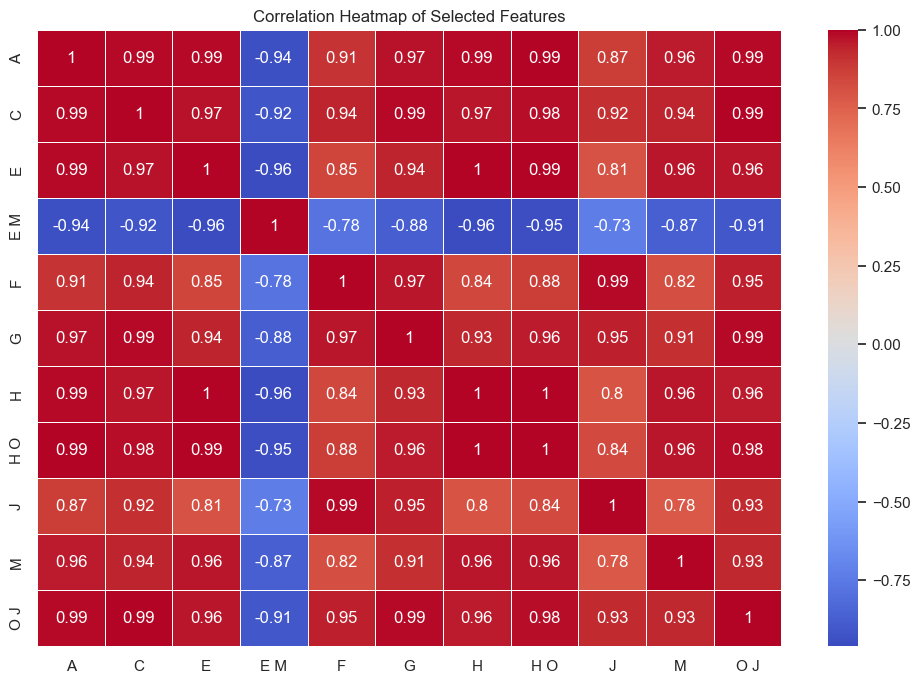

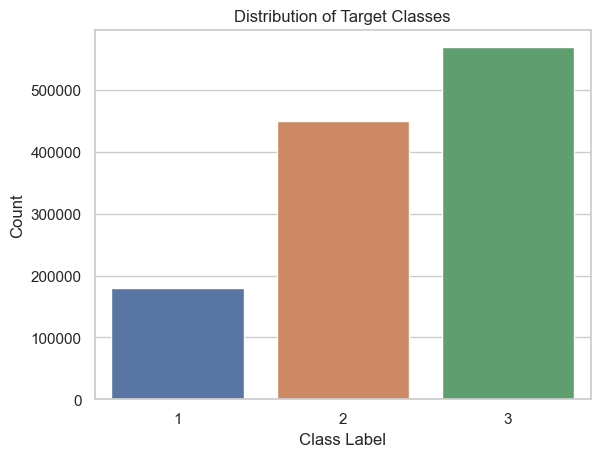

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Ensure All Features Are Numeric for Correlation Calculation
# Select numeric columns only from the dataset
X_numeric = X_final_dataset.iloc[:, :-1].select_dtypes(include=[np.number])

# Handle missing values by filling with the median value (optional)
X_numeric = X_numeric.fillna(X_numeric.median())

# Step 2: Create a Heatmap of Feature Correlations
plt.figure(figsize=(12, 8))

# Plot the correlation heatmap for the numeric features in the final dataset
sns.heatmap(X_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Add title to the heatmap for better context
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# Step 3: Plot the Distribution of Target Class
# Create a count plot to show the distribution of the target variable ('Target_Class')
sns.countplot(x=X_final_dataset['Target_Class'])

# Add a title for the target class distribution plot
plt.title("Distribution of Target Classes")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


In [39]:
from sklearn.model_selection import train_test_split

# Step 1: Define Features (X) and Target (y)
# X contains all features except 'Target_Class', and y contains the 'Target_Class'
X_features = X_final_dataset.iloc[:, :-1]  # All columns except the last one ('Target_Class')
y_target = X_final_dataset.iloc[:, -1]     # The last column ('Target_Class')

# Step 2: Split the Data into Training and Testing Sets
# Use an 80-20 split for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Step 3: Print Dataset Shapes for Verification
print(f"Training Features Shape: {X_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Labels Shape: {y_test.shape}")


Training Features Shape: (960000, 11)
Training Labels Shape: (960000,)
Testing Features Shape: (240000, 11)
Testing Labels Shape: (240000,)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the Random Forest Model
# Create a RandomForestClassifier instance with default hyperparameters
random_forest_model = RandomForestClassifier(n_estimators=50,
    max_depth=100, 
    n_jobs=-1, random_state=42)

# Step 2: Fit the Model Using the Training Data
# Train the model using the training features (X_train) and labels (y_train)
random_forest_model.fit(X_train, y_train)

# Step 3: Predict on the Test Data
# Use the trained model to predict the labels for the test features (X_test)
y_pred = random_forest_model.predict(X_test)

# Step 4: Evaluate the Model
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Print the classification report for detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Display Confusion Matrix
# Calculate the confusion matrix for the test data
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy Score: 0.7228

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.31      0.38     36189
           2       0.75      1.00      0.86     89845
           3       0.74      0.64      0.69    113966

    accuracy                           0.72    240000
   macro avg       0.66      0.65      0.64    240000
weighted avg       0.71      0.72      0.70    240000


Confusion Matrix:
[[11052     0 25137]
 [    0 89701   144]
 [11150 30096 72720]]


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Step 1: Initialize the Decision Tree Model
# Create a DecisionTreeClassifier instance with default hyperparameters
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the Model Using the Training Data
# Train the model using the training features (X_train) and labels (y_train)
decision_tree_model.fit(X_train, y_train)

# Step 3: Predict on the Test Data
# Use the trained model to predict the labels for the test features (X_test)
y_pred = decision_tree_model.predict(X_test)

# Step 4: Evaluate the Model
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Print the classification report for detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Display Confusion Matrix
# Calculate the confusion matrix for the test data
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy Score: 0.6131

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.38      0.37     36189
           2       0.75      0.73      0.74     89845
           3       0.59      0.59      0.59    113966

    accuracy                           0.61    240000
   macro avg       0.57      0.57      0.57    240000
weighted avg       0.62      0.61      0.61    240000


Confusion Matrix:
[[13605     0 22584]
 [    0 65831 24014]
 [24173 22076 67717]]


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from threadpoolctl import threadpool_limits
import multiprocessing

# Set the number of threads to the maximum available
n_threads = multiprocessing.cpu_count()

# Step 1: Initialize the SVC Model
# Create an instance of SVC with default hyperparameters
svc_model = SVC(kernel='linear', random_state=42, max_iter=10000)

# Step 2: Fit the Model Using the Training Data
# Use threadpoolctl to set thread limits
with threadpool_limits(limits=n_threads):
    # Train the model using the training features (X_train) and labels (y_train)
    svc_model.fit(X_train, y_train)

# Step 3: Predict on the Test Data
# Use the trained model to predict the labels for the test features (X_test)
y_pred = svc_model.predict(X_test)

# Step 4: Evaluate the Model
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Print the classification report for detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Display Confusion Matrix
# Calculate the confusion matrix for the test data
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy Score: 0.3195

Classification Report:
              precision    recall  f1-score   support

           1       0.19      1.00      0.33     36189
           2       0.75      0.45      0.56     89845
           3       0.00      0.00      0.00    113966

    accuracy                           0.32    240000
   macro avg       0.32      0.48      0.30    240000
weighted avg       0.31      0.32      0.26    240000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix:
[[ 36189      0      0]
 [ 49357  40488      0]
 [100549  13417      0]]


In [44]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
print(xgb.__version__)
print(xgb.get_config())

# Encode the labels to ensure they start from 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 1: Initialize the XGBClassifier Model
# Use GPU acceleration and optimized hyperparameters for speed
xgb_model = xgb.XGBClassifier(
    tree_method='hist',  # Fast histogram-based CPU training
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Step 2: Fit the Model Using the Training Data
print("Training the model...")
xgb_model.fit(
    X_train,
    y_train_encoded,
    eval_set=[(X_test, y_test_encoded)],  # Use test set for early stopping
    verbose=False  # Suppress verbose output
)

# Step 3: Predict on the Test Data
print("Predicting...")
y_pred = xgb_model.predict(X_test)

# Step 4: Evaluate the Model
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Print the classification report for detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Step 5: Display Confusion Matrix
# Calculate the confusion matrix for the test data
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

2.1.1
{'use_rmm': False, 'verbosity': 1}
Training the model...
Predicting...
Accuracy Score: 0.7240

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.35      0.41     36189
           1       0.75      1.00      0.86     89845
           2       0.75      0.63      0.68    113966

    accuracy                           0.72    240000
   macro avg       0.67      0.66      0.65    240000
weighted avg       0.71      0.72      0.71    240000


Confusion Matrix:
[[12509     0 23680]
 [    0 89835    10]
 [12427 30134 71405]]


In [45]:
print(X_final_dataset.columns)

Index(['A', 'C', 'E', 'E M', 'F', 'G', 'H', 'H O', 'J', 'M', 'O J',
       'Target_Class'],
      dtype='object')


In [67]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
import xgboost as xgb
import onnxmltools

# Step 1: Load and preprocess the dataset
dataset_path = r"/Users/chethanharinath/Documents/DPA/cleaned_data_csv(1)"

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")

data = pd.read_csv(dataset_path)

# Rename columns to match ONNX format
data.columns = [f"f{i}" for i in range(data.shape[1])]

# Split the dataset into features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the target
y = data.iloc[:, -1]   # Target column

# Relabel the target variable to start from 0
y = y - 1

# Step 2: Reduce dataset size (optional for large datasets)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.05, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Step 3: Train models
xgb_model = XGBClassifier(tree_method='hist', max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate models
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_score_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)['weighted avg']['f1-score']

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score']

print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}, F1 Score: {f1_score_xgb:.4f}")
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_score_rf:.4f}")

# Determine the best model
if f1_score_xgb > f1_score_rf:
    best_model_name = "XGBoost"
else:
    best_model_name = "Random Forest"

print(f"Best Model: {best_model_name}")

# Step 5: Convert and save both models to ONNX
output_dir = r"/Users/chethanharinath/Documents/DPA"
os.makedirs(output_dir, exist_ok=True)

# Convert XGBoost to ONNX
xgb_booster = xgb_model.get_booster()
xgb_booster.feature_names = [f"f{i}" for i in range(X_train.shape[1])]
xgb_initial_types = [('input', FloatTensorType([None, X_train.shape[1]]))]
xgb_onnx_model = onnxmltools.convert_xgboost(xgb_booster, initial_types=xgb_initial_types)

xgb_onnx_path = os.path.join(output_dir, "xgboost_best_model(2).onnx")
with open(xgb_onnx_path, "wb") as f:
    f.write(xgb_onnx_model.SerializeToString())
print(f"XGBoost ONNX model saved at {xgb_onnx_path}")

# Convert Random Forest to ONNX
rf_initial_types = [('input', FloatTensorType([None, X_train.shape[1]]))]
rf_onnx_model = convert_sklearn(rf_model, initial_types=rf_initial_types)

rf_onnx_path = os.path.join(output_dir, "random_forest_best_model(2).onnx")
with open(rf_onnx_path, "wb") as f:
    f.write(rf_onnx_model.SerializeToString())
print(f"Random Forest ONNX model saved at {rf_onnx_path}")


XGBoost - Accuracy: 0.7176, F1 Score: 0.6969
Random Forest - Accuracy: 0.7264, F1 Score: 0.6964
Best Model: XGBoost
XGBoost ONNX model saved at /Users/chethanharinath/Documents/DPA/xgboost_best_model(2).onnx
Random Forest ONNX model saved at /Users/chethanharinath/Documents/DPA/random_forest_best_model(2).onnx


In [75]:
import onnx
import onnxruntime as ort
import numpy as np

# Paths to the ONNX models
xgb_onnx_path = r"/Users/chethanharinath/Documents/DPA/xgboost_best_model(2).onnx"
rf_onnx_path = r"/Users/chethanharinath/Documents/DPA/random_forest_best_model(2).onnx"

# Function to downgrade ONNX IR version if needed
def downgrade_onnx_model(input_path, output_path, target_ir_version=9):
    model = onnx.load(input_path)
    print(f"Original IR version: {model.ir_version}")
    if model.ir_version > target_ir_version:
        model.ir_version = target_ir_version
        onnx.save(model, output_path)
        print(f"Model downgraded to IR version {target_ir_version} and saved at: {output_path}")
    else:
        print(f"No downgrade needed. IR version is already <= {target_ir_version}")

# Downgrade Random Forest ONNX model if required
rf_downgraded_path = r"/Users/chethanharinath/Documents/DPA/random_forest_best_model_v9.onnx"
downgrade_onnx_model(rf_onnx_path, rf_downgraded_path)

# Function to evaluate an ONNX model
def evaluate_onnx_model(onnx_model_path, X_test):
    # Load the ONNX model
    onnx_session = ort.InferenceSession(onnx_model_path)

    # Prepare the input data
    input_name = onnx_session.get_inputs()[0].name
    input_data = X_test.to_numpy().astype(np.float32)

    # Run the ONNX model
    onnx_predictions = onnx_session.run(None, {input_name: input_data})

    # Extract predictions
    if len(onnx_predictions[0].shape) == 1:  # Single output (e.g., Random Forest)
        y_pred_onnx = onnx_predictions[0].astype(int)
    else:  # Probabilistic output (e.g., XGBoost)
        y_pred_onnx = np.argmax(onnx_predictions[0], axis=1)
    return y_pred_onnx

# Evaluate XGBoost ONNX model
print("Evaluating XGBoost ONNX model...")
try:
    y_pred_onnx_xgb = evaluate_onnx_model(xgb_onnx_path, X_test)
    print("Predictions from XGBoost ONNX model:", y_pred_onnx_xgb)
except Exception as e:
    print(f"Error evaluating XGBoost ONNX model: {e}")

# Evaluate Random Forest ONNX model
print("Evaluating Random Forest ONNX model...")
try:
    y_pred_onnx_rf = evaluate_onnx_model(rf_downgraded_path, X_test)
    print("Predictions from Random Forest ONNX model:", y_pred_onnx_rf)
except Exception as e:
    print(f"Error evaluating Random Forest ONNX model: {e}")


Original IR version: 10
Model downgraded to IR version 9 and saved at: /Users/chethanharinath/Documents/DPA/random_forest_best_model_v9.onnx
Evaluating XGBoost ONNX model...
Predictions from XGBoost ONNX model: [2 2 2 ... 1 1 0]
Evaluating Random Forest ONNX model...
Predictions from Random Forest ONNX model: [2 2 2 ... 1 1 2]


In [76]:
from sklearn.metrics import accuracy_score, classification_report

# Function to calculate accuracy and F1 score for ONNX predictions
def evaluate_metrics(y_test, y_pred_onnx, model_name):
    # Calculate accuracy and F1 score
    accuracy_onnx = accuracy_score(y_test, y_pred_onnx)
    f1_score_onnx = classification_report(y_test, y_pred_onnx, output_dict=True)['weighted avg']['f1-score']

    # Print evaluation metrics
    print(f"{model_name} ONNX Model - Accuracy: {accuracy_onnx:.4f}")
    print(f"{model_name} ONNX Model - F1 Score: {f1_score_onnx:.4f}")

# Evaluate metrics for XGBoost ONNX model
print("Evaluating metrics for XGBoost ONNX model...")
try:
    evaluate_metrics(y_test, y_pred_onnx_xgb, "XGBoost")
except Exception as e:
    print(f"Error calculating metrics for XGBoost ONNX model: {e}")

# Evaluate metrics for Random Forest ONNX model
print("Evaluating metrics for Random Forest ONNX model...")
try:
    evaluate_metrics(y_test, y_pred_onnx_rf, "Random Forest")
except Exception as e:
    print(f"Error calculating metrics for Random Forest ONNX model: {e}")


Evaluating metrics for XGBoost ONNX model...
XGBoost ONNX Model - Accuracy: 0.7176
XGBoost ONNX Model - F1 Score: 0.6969
Evaluating metrics for Random Forest ONNX model...
Random Forest ONNX Model - Accuracy: 0.7264
Random Forest ONNX Model - F1 Score: 0.6964
